# Install Requirements

In [293]:
%pip install pandas matplotlib matplotlib-venn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [294]:
import pandas as pd

# Load Data

In [295]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [296]:
prefixes = ["https://", "http://", "www.", '"']
suffixes = ["/", '"']


def strip_url(url: str) -> str:
    for prefix in sorted(prefixes):
        if url.startswith(prefix):
            url = url[len(prefix) :]
    for suffix in sorted(suffixes):
        if url.endswith(suffix):
            url = url[: -len(suffix)]
    return url.strip()


urls = [
    "http://muurmooi.nl/",
    "museumpassmusees.be",
    '"wikipedia.org "',
    "http://www.fonq.nl",
]
expecteds = ["muurmooi.nl", "museumpassmusees.be", "wikipedia.org", "fonq.nl"]

for url, expected in zip(urls, expecteds):
    stripped = strip_url(url)
    assert stripped == expected, f"Got: {stripped}\tExpected: {expected}"

In [297]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "08ed52f6-66b4-4f44-905f-7adf983c0b00_Export-5b44b9e6-71d6-4ac9-906a-d5a96154bef9"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [298]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
        converters={"Name": strip_url},
    )
    .dropna(subset=["Name", "NR"])
    .set_index("Name", verify_integrity=True)
)
sources.head()

URL Domein   Onderwerpen  \
Name                                                            
24baby.nl                https://www.24baby.nl/           NaN   
24kitchen.nl           https://www.24kitchen.nl           NaN   
333travel.nl          https://www.333travel.nl/           NaN   
absolutefacts.nl  https://www.absolutefacts.nl/  geschiedenis   
accuautoshop.nl    https://www.accuautoshop.nl/           NaN   

                                    Sector  \
Name                                         
24baby.nl         Winkels en bedrijven div   
24kitchen.nl       Entertainment-industrie   
333travel.nl              Reisorganisaties   
absolutefacts.nl         Internetbedrijven   
accuautoshop.nl   Winkels en bedrijven div   

                                                            Reclame  \
Name                                                                  
24baby.nl                                          over_the_top_ads   
24kitchen.nl      company_promotion, limited_ads, sluikreclame -...   
333travel.nl                                      company_promotion   
absolutefacts.nl                                  company_promotion   
accuautoshop.nl                                   company_promotion   

                  uBlocked trackers Commercialiteit Div Labels NGO  \
Name                                                                 
24baby.nl                         5     commercieel            NaN   
24kitchen.nl                     17     commercieel            NaN   
333travel.nl                      7     commercieel            NaN   
absolutefacts.nl                  2     commercieel            NaN   
accuautoshop.nl                   6     commercieel            NaN   

                                        Conclusie over doel vd bron  \
Name                                                                  
24baby.nl         div. commercieel informatieproducten, reclamev...   
24kitchen.nl      div. commercieel informatieproducten, entertai...   
333travel.nl                       webshop/winkel+promotioneel deel   
absolutefacts.nl               div. commercieel informatieproducten   
accuautoshop.nl                    webshop/winkel+promotioneel deel   

                                        Vrije labels bron/onderwerp  \
Name                                                                  
24baby.nl         nieuws, promotioneel, reclamevehikel, webshop,...   
24kitchen.nl              entertainment, infotainment, promotioneel   
333travel.nl      (product)informatie ihkv verkoop/bezoek, bedri...   
absolutefacts.nl                   informatie_primair_doel, webshop   
accuautoshop.nl                                             webshop   

                 Thumbs up 8-14?  ...               Created time  \
Name                              ...                              
24baby.nl           Just-in-case  ...  November 6, 2023 11:09 AM   
24kitchen.nl        Just-in-case  ...  December 14, 2023 6:43 PM   
333travel.nl        Just-in-case  ...  February 23, 2024 5:35 PM   
absolutefacts.nl         Twijfel  ...  December 14, 2023 7:29 PM   
accuautoshop.nl              Nee  ...  February 22, 2024 3:23 PM   

                        Created by  \
Name                                 
24baby.nl         Maarten Sprenger   
24kitchen.nl      Maarten Sprenger   
333travel.nl      Maarten Sprenger   
absolutefacts.nl  Maarten Sprenger   
accuautoshop.nl   Maarten Sprenger   

                                                  URL Moederbedrijf  \
Name                                                                  
24baby.nl                                                       NaN   
24kitchen.nl      https://privacy.thewaltdisneycompany.com/nl/de...   
333travel.nl                                                    NaN   
absolutefacts.nl                    https://www.absolutefigures.nl/   
accuautoshop.nl                                                 NaN   

                 SlimZ Resultat

In [299]:
sources.columns

Index(['URL Domein', 'Onderwerpen', 'Sector', 'Reclame', 'uBlocked trackers',
       'Commercialiteit', 'Div Labels NGO', 'Conclusie over doel vd bron',
       'Vrije labels bron/onderwerp', 'Thumbs up 8-14?', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR',
       'Toegankelijkheidspagina', 'Resultaten DB', 'Extra URL', 'Created time',
       'Created by', 'URL Moederbedrijf', 'SlimZ Resultaten DB',
       'Resultaten: toegankelijkheid', 'Cookie info page', 'More examples',
       'Related to Resultaten DB 01 (1) (Bronnen DB)', 'Res: Ranking',
       'Res: soort result '],
      dtype='object')

In [300]:
len(sources)

542

## Load Query DB

In [301]:
QUERY_DIR = DATA_DIR / Path(
    "4fdaffd9-2ef6-43e9-9cbd-29c8b7b75f85_Export-a35ef075-cf88-430a-83eb-9885bea0ecb1/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [302]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

OK-100                 Query  Leeftijd        Onderwerp  \
3    Yes                 leven         8  Natuur/Biologie   
4    Yes  wat betekent schotse        10     Taal/Cultuur   
5    Yes      middellandse zee        11   Aardrijkskunde   
6    Yes                  geld         9     Maatschappij   
9    Yes            De smurfen        10     Taal/Cultuur   

  Soort Query (select)                                             Google  \
3         Named entity  https://www.google.com/search?q=leven&rlz=1C5C...   
4               Vragen  https://www.google.com/search?q=wat+betekent+s...   
5         Named entity  https://www.google.com/search?q=middellandse+z...   
6            Eén woord  https://www.google.nl/search?q=geld&sca_esv=59...   
9         Named entity  https://www.google.nl/search?q=De+smurfen&sca_...   

  'Samenvatting'? Add Results  \
3             Nee        Done   
4              Ja        Done   
5             Nee        Done   
6             Nee        Done   
9             Nee        Done   

                                          Bronnen DB  Bronnen DB 1  ...  \
3                                                NaN           NaN  ...   
4                                                NaN           NaN  ...   
5                                                NaN           NaN  ...   
6                                                NaN           NaN  ...   
9  google.nl/com (https://www.notion.so/google-nl...           NaN  ...   

   Bronnen: Toeg.  Date Extra (multi)  \
3             NaN   NaN   Media(ster)   
4             NaN   NaN           NaN   
5             NaN   NaN           NaN   
6             NaN   NaN           NaN   
9             NaN   NaN  Merk/Bedrijf   

                                    Extra (top-down) Kennisvenster?  \
3  Gerelateerde zoekopdrachten (na 10), Meer om t...            Nee   
4                           Vragen van anderen (top)            Nee   
5  Afbeeldingen carroussel (top), Gerelateerde zo...  Ja uitgebreid   
6  Gerelateerde zoekopdrachten (na 10), Lokaal ni...            Nee   
9  Gerelateerde zoekopdrachten (na 10), Meer om t...             Ja   

                                         Opmerkingen Ranking Conclusie  \
3                                                NaN               NaN   
4                                                NaN               NaN   
5                                                NaN               NaN   
6  Merkwaardig, eerste paar video resultaten zijn...               NaN   
9                                                NaN               NaN   

                                       Resultaten DB  \
3                                                NaN   
4  Schotse - 2 definities - Encyclo (https://www....   
5                                                NaN   
6                                                NaN   
9                                                NaN   

                                         Video Facet Videos-Schooltv?  
3  https://www.google.com/search?sca_esv=60037616...                -  
4  https://www.google.com/search?sca_esv=60037616...                -  
5  https://www.google.com/search?sca_esv=60037616...                -  
6  https://www.google.nl/search?sca_esv=598588983...   - (klokhuis 9)  
9  https://www.google.nl/search?sca_esv=578451392...                -  

[5 rows x 21 columns]

In [303]:
len(queries)

100

## Load Results DB

In [304]:
RESULTS_DIR = DATA_DIR / Path(
    "eceaf982-edff-418b-9158-ccd8ca0f3135_Export-920b4668-cc69-4f8b-9e24-04a528ba1d9c 2"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [305]:
results = (
    pd.read_csv(
        RESULTS_FILE,
        converters={"Bronnen DB": str.strip},
    )
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

Bron: Thumbs up?                          Titel resultaat  \
0     Just-in-case         Schotse - 2 definities - Encyclo   
1              Nee  Gratis woordenboek | Van Dale NEDERLAND   
2     Just-in-case                 Schots - WikiWoordenboek   
3               Ja          Wat is de betekenis van Schotse   
4               Ja                    Schotland - Wikipedia   

                                      Link/resultaat  \
0  https://www.encyclo.nl/begrip/schotse#:~:text=...   
1  https://www.vandale.nl/gratis-woordenboek/nede...   
2              https://nl.wiktionary.org/wiki/Schots   
3             https://www.ensie.nl/betekenis/schotse   
4            https://nl.wikipedia.org/wiki/Schotland   

                                               Query  \
0  wat betekent schotse (https://www.notion.so/wa...   
1  wat betekent schotse (https://www.notion.so/wa...   
2  wat betekent schotse (https://www.notion.so/wa...   
3  wat betekent schotse (https://www.notion.so/wa...   
4  wat betekent schotse (https://www.notion.so/wa...   

                                          Bronnen DB  \
0  encyclo.nl (https://www.notion.so/encyclo-nl-9...   
1  vandale.nl (https://www.notion.so/vandale-nl-8...   
2  wiktionary.org (https://www.notion.so/wiktiona...   
3  Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...   
4  wikipedia.org  (https://www.notion.so/wikipedi...   

                      Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  \
0                   Slot Webcommerce bv.                             complex   
1  Van Dale Uitgevers, Utrecht/Antwerpen                             complex   
2       Wiktionary, Wikimedia foundation                             complex   
3           Stichting Ensie Encyclopedie               redelijk begrijpelijk   
4               Wikimedia Foundation inc                             complex   

       Relevant? vrije tags page Soort Resultaat  ...  \
0       relevant             NaN     informatief  ...   
1  niet_relevant             NaN     informatief  ...   
2  niet_relevant             NaN     informatief  ...   
3       relevant             NaN     informatief  ...   
4       relevant             NaN     informatief  ...   

                                  Bron: Vrije labels  \
0  aggregator/contentfarm,encyclopedie,portal,woo...   
1  paywall (geheel/gedeeltelijk),webshop,woordenboek   
2            user_generated_content,wiki,woordenboek   
3  encyclopedie,informatie_primair_doel,kennisban...   
4  community,informatie_primair_doel,user_generat...   

                                    Bron: doel Trackers  \
0         div. commercieel informatieproducten        7   
1         div. commercieel informatieproducten        4   
2  gebruikersplatform met kwaliteitsinformatie        0   
3     div. non-commercieel informatieproducten        1   
4  gebruikersplatform met kwaliteitsinformatie        1   

  Related to Bronnen DB test (Resultaten DB)         Bronnen: URL domein  \
0                                        NaN              www.encyclo.nl   
1                                        NaN     https://www.vandale.nl/   
2                                        NaN  https://nl.wiktionary.org/   
3                                        NaN       https://www.ensie.nl/   
4                                        NaN   https://nl.wikipedia.org/   

  OnderzoekNr Query: Video Schooltv        Created by        Bron-Status  \
0           1                     -  Maarten Sprenger  Needs peer-review   
1           1                     -  Maarten Sprenger               Done   
2           1                     -  Maarten Sprenger   Almost completed   
3           1                     -  Maarten Sprenger   Almost completed   
4           1                     -  Maarten Sprenger               Done   

   Ranking  
0        1  
1        3  
2        6  
3        7  
4        8  

[5 rows x 26 columns]

In [306]:
len(results)

998

In [307]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

results[["Query", "Bronnen DB"]]

Query  \
0    wat betekent schotse (https://www.notion.so/wa...   
1    wat betekent schotse (https://www.notion.so/wa...   
2    wat betekent schotse (https://www.notion.so/wa...   
3    wat betekent schotse (https://www.notion.so/wa...   
4    wat betekent schotse (https://www.notion.so/wa...   
..                                                 ...   
993  geld (https://www.notion.so/geld-03503decdc9c4...   
994  geld (https://www.notion.so/geld-03503decdc9c4...   
995  geld (https://www.notion.so/geld-03503decdc9c4...   
996  geld (https://www.notion.so/geld-03503decdc9c4...   
997  geld (https://www.notion.so/geld-03503decdc9c4...   

                                            Bronnen DB  
0    encyclo.nl (https://www.notion.so/encyclo-nl-9...  
1    vandale.nl (https://www.notion.so/vandale-nl-8...  
2    wiktionary.org (https://www.notion.so/wiktiona...  
3    Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...  
4    wikipedia.org  (https://www.notion.so/wikipedi...  
..                                                 ...  
993  telegraaf.nl (https://www.notion.so/telegraaf-...  
994  ad.nl (https://www.notion.so/ad-nl-800ddede7f5...  
995  rtlnieuws.nl (https://www.notion.so/rtlnieuws-...  
996  nibud.nl (https://www.notion.so/nibud-nl-624f2...  
997  rijksoverheid.nl (https://www.notion.so/rijkso...  

[998 rows x 2 columns]

In [308]:
for column in COLUMNS_WITH_LINK:
    results[column] = (
        (results[column].str.split(" \(").str[0])
        .astype(pd.StringDtype())
        .apply(strip_url)
    )
results[COLUMNS_WITH_LINK]

Query        Bronnen DB
0    wat betekent schotse        encyclo.nl
1    wat betekent schotse        vandale.nl
2    wat betekent schotse    wiktionary.org
3    wat betekent schotse          Ensie.nl
4    wat betekent schotse     wikipedia.org
..                    ...               ...
993                  geld      telegraaf.nl
994                  geld             ad.nl
995                  geld      rtlnieuws.nl
996                  geld          nibud.nl
997                  geld  rijksoverheid.nl

[998 rows x 2 columns]

In [309]:
# Filter out results that are not in the 100 queries set
results = results.loc[results["Query"].isin(queries["Query"])]  # .reindex()
len(results)

998

In [310]:
results.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Bron: Commerciality', 'Bron: Sector', 'Q: soort',
       'Bron: reclame', 'Opmerking', 'Ranking vrije labels',
       'Bron: Vrije labels', 'Bron: doel', 'Trackers',
       'Related to Bronnen DB test (Resultaten DB)', 'Bronnen: URL domein',
       'OnderzoekNr', 'Query: Video Schooltv', 'Created by', 'Bron-Status',
       'Ranking'],
      dtype='object')

## Join Results and Sources

In [311]:
results_sources = results.join(
    sources, on="Bronnen DB", how="left", lsuffix="_source", rsuffix="_result"
)

results_sources

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                   Schotse - 2 definities - Encyclo   
1                Nee            Gratis woordenboek | Van Dale NEDERLAND   
2       Just-in-case                           Schots - WikiWoordenboek   
3                 Ja                    Wat is de betekenis van Schotse   
4                 Ja                              Schotland - Wikipedia   
..               ...                                                ...   
993     Just-in-case  Geld | Het laatste nieuws uit Nederland lees j...   
994     Just-in-case                                       Geld | AD.nl   
995     Just-in-case                                  Geld | RTL Nieuws   
996               Ja  Het Nibud (Nationaal Instituut voor Budgetvoor...   
997               Ja  Hoeveel contant geld mag ik thuis bewaren? | R...   

                                        Link/resultaat                 Query  \
0    https://www.encyclo.nl/begrip/schotse#:~:text=...  wat betekent schotse   
1    https://www.vandale.nl/gratis-woordenboek/nede...  wat betekent schotse   
2                https://nl.wiktionary.org/wiki/Schots  wat betekent schotse   
3               https://www.ensie.nl/betekenis/schotse  wat betekent schotse   
4              https://nl.wikipedia.org/wiki/Schotland  wat betekent schotse   
..                                                 ...                   ...   
993           https://www.telegraaf.nl/financieel/geld                  geld   
994  https://www.ad.nl/geld/?referrer=https%3A%2F%2...                  geld   
995  https://www.rtlnieuws.nl/tags/onderwerpen/econ...                  geld   
996                              https://www.nibud.nl/                  geld   
997  https://www.rijksoverheid.nl/onderwerpen/geldz...                  geld   

           Bronnen DB                                 Bron: Inst/Bedrijf  \
0          encyclo.nl                               Slot Webcommerce bv.   
1          vandale.nl              Van Dale Uitgevers, Utrecht/Antwerpen   
2      wiktionary.org                   Wiktionary, Wikimedia foundation   
3            Ensie.nl                       Stichting Ensie Encyclopedie   
4       wikipedia.org                           Wikimedia Foundation inc   
..                ...                                                ...   
993      telegraaf.nl             De Telegraaf, Mediahuis Nederland B.V.   
994             ad.nl                                AD, DPG Media Group   
995      rtlnieuws.nl                                 RTL Nederland B.V.   
996          nibud.nl  Nibud (Nationaal Instituut voor Budgetvoorlich...   
997  rijksoverheid.nl                                      Rijksoverheid   

    Toegankelijkheid doelgroep (indruk)      Relevant? vrije tags page  \
0                               complex       relevant             NaN   
1                               complex  niet_relevant             NaN   
2                               complex  niet_relevant             NaN   
3                 redelijk begrijpelijk       relevant             NaN   
4                               complex       relevant             NaN   
..                                  ...            ...             ...   
993                                 nvt       relevant             NaN   
994                                 nvt       relevant             NaN   
995                                 nvt       relevant             NaN   
996               redelijk begrijpelijk      misschien             NaN   
997               redelijk begrijpelijk      misschien             NaN   

    Soort Resultaat  ...                Created time Created by_result  \
0       informatief  ...   October 26, 2023 10:25 AM  Maarten Sprenger   
1       informatief  ...   October 26, 2023 12:23 PM  Maarten Sprenger   
2       informatief  ...   October 26, 2023 12:22 PM  Maarten Sprenger   
3       informatief  ...   October 26, 2023 

In [312]:
results_sources.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Relevant?', 'vrije tags page',
       'Soort Resultaat', 'Bron: Commerciality', 'Bron: Sector', 'Q: soort',
       'Bron: reclame', 'Opmerking', 'Ranking vrije labels',
       'Bron: Vrije labels', 'Bron: doel', 'Trackers',
       'Related to Bronnen DB test (Resultaten DB)', 'Bronnen: URL domein',
       'OnderzoekNr', 'Query: Video Schooltv', 'Created by_source',
       'Bron-Status', 'Ranking', 'URL Domein', 'Onderwerpen', 'Sector',
       'Reclame', 'uBlocked trackers', 'Commercialiteit', 'Div Labels NGO',
       'Conclusie over doel vd bron', 'Vrije labels bron/onderwerp',
       'Thumbs up 8-14?', 'Status', 'About page', ' Notes', 'Kwaliteit_about',
       'Instelling/Bedrijf/Persoon', 'Resultaten: vrije labels',
       'Moederbedrijf DB', 'NR', 'Toegankelijkheidspagina', 'Resultaten DB',
       'Extra URL', 'Created ti

### DEBUG: results vs sources

In [313]:
sources.loc[sources.index.str.contains("fonq")]

URL Domein Onderwerpen                    Sector  \
Name                                                                  
fonq.nl  https://www.fonq.nl/         NaN  Winkels en bedrijven div   

                   Reclame  uBlocked trackers Commercialiteit Div Labels NGO  \
Name                                                                           
fonq.nl  company_promotion                  8     commercieel            NaN   

                Conclusie over doel vd bron Vrije labels bron/onderwerp  \
Name                                                                      
fonq.nl  alleen webshop+productomschrijving                     webshop   

        Thumbs up 8-14?  ...               Created time        Created by  \
Name                     ...                                                
fonq.nl             Nee  ...  February 22, 2024 1:54 PM  Maarten Sprenger   

        URL Moederbedrijf SlimZ Resultaten DB Resultaten: toegankelijkheid  \
Name                                                                         
fonq.nl               NaN                 NaN                          NaN   

        Cookie info page More examples  \
Name                                     
fonq.nl              NaN           NaN   

        Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
Name                                                                
fonq.nl                                          NaN          9,5   

                  Res: soort result   
Name                                  
fonq.nl  transactional,transactional  

[1 rows x 31 columns]

In [314]:
results.loc[results["Bronnen DB"].str.contains("fonq")]

Bron: Thumbs up?                                    Titel resultaat  \
210              Nee  Vogelhuis kopen? Kies uit 50+ Vogelhuisjes bij...   
964              Nee  Stijlvolle klokken: vind jouw unieke klok bij ...   

                                        Link/resultaat           Query  \
210  https://www.fonq.nl/producten/categorie-vogelh...  vogels huisjes   
964   https://www.fonq.nl/producten/categorie-klokken/         klokken   

    Bronnen DB Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  \
210    fonq.nl               fonQ                                 nvt   
964    fonq.nl               fonQ                                 nvt   

     Relevant?      vrije tags page Soort Resultaat  ... Bron: Vrije labels  \
210  misschien  webshop-result page   transactional  ...            webshop   
964   relevant  webshop-result page   transactional  ...            webshop   

                             Bron: doel Trackers  \
210  alleen webshop+productomschrijving        8   
964  alleen webshop+productomschrijving        8   

    Related to Bronnen DB test (Resultaten DB)   Bronnen: URL domein  \
210                                        NaN  https://www.fonq.nl/   
964                                        NaN  https://www.fonq.nl/   

    OnderzoekNr Query: Video Schooltv        Created by  Bron-Status  Ranking  
210           1                 8, 10  Maarten Sprenger         Done        9  
964           1                    -   Maarten Sprenger         Done        5  

[2 rows x 26 columns]

In [315]:
results.loc[~results["Bronnen DB"].str.strip().isin(sources.index.str.strip())][
    "Bronnen DB"
]

Series([], Name: Bronnen DB, dtype: object)

In [316]:
results_sources.loc[results_sources["Commercialiteit"].isna()]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Relevant?, vrije tags page, Soort Resultaat, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Ranking vrije labels, Bron: Vrije labels, Bron: doel, Trackers, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, OnderzoekNr, Query: Video Schooltv, Created by_source, Bron-Status, Ranking, URL Domein, Onderwerpen, Sector, Reclame, uBlocked trackers, Commercialiteit, Div Labels NGO, Conclusie over doel vd bron, Vrije labels bron/onderwerp, Thumbs up 8-14?, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, NR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result ]
Index: []

[0 rows x 57 columns]

## Match Sources and Queries

In [317]:
query = queries["Query"].sample(n=1).iloc[0]
query

'auto 1885'

In [318]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
754               Ja   Geschiedenis van de auto (1885-1904) - Wikipedia   
755     Just-in-case             auto 1885 - Google Zoeken Afbeeldingen   
756               Ja   Geschiedenis van de auto (voor 1885) - Wikipedia   
757               Ja        Wie bouwde de eerste auto? | historianet.nl   
758               Ja                        De geschiedenis van de auto   
759               Ja     Wie heeft de auto uit gevonden? | Willem Wever   
760              Nee                Geschiedenis van de auto - Wikikids   
761     Just-in-case            Uitvinding van de auto | IsGeschiedenis   
762     Just-in-case  Honderd jaar auto: 1885-1985 - Andrew Whyte, J...   
763              Nee    Geschiedenis van de auto (voor 1885) - Wikiwand   

                                        Link/resultaat      Query  \
754  https://nl.wikipedia.org/wiki/Geschiedenis_van...  auto 1885   
755  https://www.google.nl/search?sca_esv=596546401...  auto 1885   
756  https://nl.wikipedia.org/wiki/Geschiedenis_van...  auto 1885   
757  https://historianet.nl/techniek/uitvindingen/w...  auto 1885   
758  https://www.docukit.nl/spreekbeurt/de-geschied...  auto 1885   
759  https://willemwever.kro-ncrv.nl/vraag_antwoord...  auto 1885   
760       https://wikikids.nl/Geschiedenis_van_de_auto  auto 1885   
761  https://isgeschiedenis.nl/nieuws/uitvinding-va...  auto 1885   
762  https://www.deslegte.com/honderd-jaar-auto-188...  auto 1885   
763  https://www.wikiwand.com/nl/Geschiedenis_van_d...  auto 1885   

                  Bronnen DB  \
754            wikipedia.org   
755            google.nl/com   
756            wikipedia.org   
757           historianet.nl   
758               docukit.nl   
759  willemwever.kro-ncrv.nl   
760              wikikids.nl   
761        isgeschiedenis.nl   
762             deslegte.com   
763             wikiwand.com   

                                    Bron: Inst/Bedrijf  \
754                           Wikimedia Foundation inc   
755                                            Aphabet   
756                           Wikimedia Foundation inc   
757  Bonnier Publications International AS (Noorweg...   
758                                      Schoolsupport   
759                                           KRO-NCRV   
760  Stichting Wikikids, ondersteund door Kennisnet...   
761                                  Isgeschiedenis.nl   
762                                          De Slegte   
763                                           Wikiwand   

    Toegankelijkheid doelgroep (indruk) Relevant?         vrije tags page  \
754                             complex  relevant                     NaN   
755                                 nvt  relevant  zoekmachine facet link   
756                             complex  relevant                     NaN   
757               redelijk begrijpelijk  relevant                     NaN   
758               redelijk begrijpelijk  relevant                     NaN   
759               redelijk begrijpelijk  relevant                     NaN   
760               redelijk begrijpelijk  relevant                     NaN   
761               redelijk begrijpelijk  relevant                     NaN   
762                                 nvt  relevant     webshop-result page   
763                             complex  relevant                     NaN   

    Soort Resultaat  ...                                 Bron: Vrije labels  \
754     informatief  ...  community,informatie_primair_doel,user_generat...   
755    navigational  ...                               BigTech,zoekmachines   
756     informatief  ...  community,informatie_primair_doel,user_generat...   
757     informatief  ...  about-voorbeeld,infinite_scroll,log_in (geheel...   
758     informatief  ...  bedrijfsinfo/uithangbord,doelgroep PO/8-12,inf...   
759     informatief  ...  doelgroep PO/8-12,edutainment,infinite_scroll,...   
760     informatief  ... 

### DEBUG: Queries

In [319]:
set(results_sources.groupby("Query").groups.keys()) - set(queries["Query"])

set()

In [320]:
all_queries.loc[all_queries["Query"] == "cristiano ronaldo"]

OK-100              Query  Leeftijd Onderwerp Soort Query (select)  \
26     No  cristiano ronaldo        11     Sport            Eén woord   

                                               Google 'Samenvatting'?  \
26  https://www.google.com/search?q=cristiano+rona...             Nee   

   Add Results Bronnen DB  Bronnen DB 1  ...           Created time  Date  \
26        Done        NaN           NaN  ...  July 18, 2023 7:47 PM   NaN   

   Extra (multi)                                   Extra (top-down)  \
26           NaN  Gerelateerde zoekopdrachten (na 10), Meer om t...   

   Kennisvenster?                  Opmerkingen Ranking Conclusie  \
26             Ja  resultaten apart opgeslagen               NaN   

   Resultaten DB Video Facet Videos-Schooltv?  
26           NaN         NaN              NaN  

[1 rows x 22 columns]

In [321]:
results_sources.loc[results_sources["Query"] == "cristiano ronaldo"]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Relevant?, vrije tags page, Soort Resultaat, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Ranking vrije labels, Bron: Vrije labels, Bron: doel, Trackers, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, OnderzoekNr, Query: Video Schooltv, Created by_source, Bron-Status, Ranking, URL Domein, Onderwerpen, Sector, Reclame, uBlocked trackers, Commercialiteit, Div Labels NGO, Conclusie over doel vd bron, Vrije labels bron/onderwerp, Thumbs up 8-14?, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, NR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result ]
Index: []

[0 rows x 57 columns]

# Analysis

## Results

### Combined Criteria

In [322]:
column = "ok_for_students"
results_sources[column] = (results_sources["Soort Resultaat"] != "transactional") & (
    results_sources["Thumbs up 8-14?"] == "Ja"
)
results_sources[column].sum()

377

In [323]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
693               Ja                  De nachtbraker | Vogelbescherming   
612               Ja  Braziliaanse voetballegende Pelé overleden op ...   
103               Ja                            Waterbuffel - Wikipedia   
223               Ja                                 Orgaan - Wikipedia   
113               Ja                           Slavenhandel - Wikipedia   
..               ...                                                ...   
352               Ja               Toerisme Spiere-Helkijn | Leiestreek   
452               Ja                                Diarree - Wikipedia   
401               Ja  Correct gebruik van aanhalingstekens – Correct...   
70                Ja         Brussels Hoofdstedelijk Gewest - Wikipedia   
663               Ja  Koraalrif herstelt zich in enkele delen van Gr...   

                                        Link/resultaat  \
693  https://www.vogelbescherming.nl/beleefdelente/...   
612  https://nos.nl/collectie/13920/artikel/2458125...   
103          https://nl.wikipedia.org/wiki/Waterbuffel   
223  https://nl.wikipedia.org/wiki/Orgaan#:~:text=E...   
113         https://nl.wikipedia.org/wiki/Slavenhandel   
..                                                 ...   
352  https://www.toerisme-leiestreek.be/nl/toerisme...   
452              https://nl.wikipedia.org/wiki/Diarree   
401  https://www.correctnederlands.nl/correct-gebru...   
70   https://nl.wikipedia.org/wiki/Brussels_Hoofdst...   
663  https://www.vrt.be/vrtnws/nl/2022/08/04/koraal...   

                                          Query              Bronnen DB  \
693                           nachtbraker vogel         Beleef de lente   
612  braziliaanse voetballegende pele overleden                  nos.nl   
103                                 waterbuffel           wikipedia.org   
223                            Wat zijn organen           wikipedia.org   
113                                Slavenhandel           wikipedia.org   
..                                          ...                     ...   
352                                      spiere  toerisme-leiestreek.be   
452                                      diaree           wikipedia.org   
401                  wat is een begin aanhaling    correctnederlands.nl   
70                                      brussel           wikipedia.org   
663                         het groot Barrierif                  vrt.be   

                     Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  \
693                    Vogelbescherming                           te simpel   
612  Nederlandse Omroep Stichting (NOS)               redelijk begrijpelijk   
103            Wikimedia Foundation inc                             complex   
223            Wikimedia Foundation inc                             complex   
113            Wikimedia Foundation inc                             complex   
..                                  ...                                 ...   
352                            Westtoer                                 nvt   
452            Wikimedia Foundation inc                             complex   
401  Correct Nederlands, Frank den Hond               redelijk begrijpelijk   
70             Wikimedia Foundation inc                             complex   
663                                VRT                              complex   

    Relevant?      vrije tags page Soort Resultaat  ... Created by_result  \
693  relevant  video/image-caption     informatief  ...  Maarten Sprenger   
612  relevant                  NaN     informatief  ...  Maarten Sprenger   
103  relevant                  NaN     informatief  ...  Maarten Sprenger   
223  relevant                  NaN     informatief  ...  Maarten Sprenger   
113  relevant                  NaN     informatief  ...  Maarten Sprenger   
..        ...                  ...             ...  ...               ...   
352  relevant    

In [324]:
column = "good_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "informatief")
    & (results_sources["Thumbs up 8-14?"] == "Ja")
    & (
        results["Toegankelijkheid doelgroep (indruk)"].str.contains(
            "redelijk begrijpelijk"
        )
        | results["Toegankelijkheid doelgroep (indruk)"].str.contains("eenvoudig")
    )
)
results_sources[column].sum()

178

In [325]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
514               Ja  Wat is je spijsvertering? - Maag Lever Darm St...   
253               Ja               Voortplanting (biologie) - Wikipedia   
402               Ja          Watersnoodramp 1953 - Canon van Nederland   
422               Ja                                Marrons - Wikipedia   
443               Ja                      Ik heb diarree | Thuisarts.nl   
..               ...                                                ...   
673               Ja                     Houten galei | Industriemuseum   
49                Ja      Kwaliteit van leven | Volksgezondheid en Zorg   
362               Ja        PowerPoint-presentatie Giraffe Wildlands.nl   
28                Ja  Belgische koning Albert (89) onwel geworden en...   
420               Ja  Vertrekhal Schiphol alleen toegankelijk voor r...   

                                        Link/resultaat  \
514  https://www.mlds.nl/spijsvertering/wat-is-je-s...   
253  https://nl.wikipedia.org/wiki/Voortplanting_(b...   
402  https://www.canonvannederland.nl/nl/zeeland/ve...   
422              https://nl.wikipedia.org/wiki/Marrons   
443    https://www.thuisarts.nl/diarree/ik-heb-diarree   
..                                                 ...   
673  https://www.industriemuseum.be/nl/collectie-it...   
49           https://www.vzinfo.nl/Kwaliteit-van-leven   
362  https://www.wildlands.nl/uploads/animals/Diere...   
28   https://nos.nl/artikel/2480443-belgische-konin...   
420  https://www.parool.nl/nederland/vertrekhal-sch...   

                            Query            Bronnen DB  \
514                 taak slokdarm               mlds.nl   
253                 voortplanting         wikipedia.org   
402  westerschelde waternoodsramp  canonvannederland.nl   
422                       marrons         wikipedia.org   
443                        diaree          thuisarts.nl   
..                            ...                   ...   
673                         galei    industriemuseum.be   
49                          leven             vzinfo.nl   
362           waar leven giraffen          wildlands.nl   
28            koning van belgieje                nos.nl   
420    vertrekhal met inchekbalie             parool.nl   

                                    Bron: Inst/Bedrijf  \
514                          Maag Lever Darm Stichting   
253                           Wikimedia Foundation inc   
402  Nederlands Openluchtmuseum / canonvannederland.nl   
422                           Wikimedia Foundation inc   
443  Thuisarts.nl, Het Nederlands Huisartsen Genoot...   
..                                                 ...   
673                                Het Industriemuseum   
49   RIVM in opdracht van het Ministerie van Volksg...   
362                                                NaN   
28                  Nederlandse Omroep Stichting (NOS)   
420                          Het Parool, DPG Media B.V   

    Toegankelijkheid doelgroep (indruk)  Relevant? vrije tags page  \
514               redelijk begrijpelijk   relevant             NaN   
253               redelijk begrijpelijk   relevant             NaN   
402               redelijk begrijpelijk   relevant             NaN   
422               redelijk begrijpelijk   relevant             NaN   
443               redelijk begrijpelijk   relevant             NaN   
..                                  ...        ...             ...   
673               redelijk begrijpelijk   relevant             NaN   
49                redelijk begrijpelijk  misschien             NaN   
362               redelijk begrijpelijk   relevant             pdf   
28                            eenvoudig   relevant             NaN   
420               redelijk begrijpelijk   relevant             NaN   

    Soort Resultaat  ...                    URL Moederbedrijf  \
514     informatief  ...                                  NaN   
253     informatief  ...     

In [326]:
column = "bad_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "transactional")
    & (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("reclamevehikel")
    )
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("aggregator")
    )
    | (
        results_sources["Vrije labels bron/onderwerp"]
        .fillna("")
        .str.contains("clickbait")
    )
    | (results_sources["Vrije labels bron/onderwerp"].fillna("").str.contains("porno"))
)
results_sources[column].sum()

31

In [327]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
172              Nee                         Blote vrouwen | Naaktkrant   
173              Nee                Naakte Vrouwen Verzameld - Seks Met   
526              Nee  Verschrikkelijk: mama vergeet peuter op autoda...   
174              Nee  Meest bekeken mooie naakte vrouwen, de top 100...   
164              Nee                 Zebrahaai | DierenWiki | Zebrahaai   
507              Nee  Straatkinderen. slapen op stenen, eten uit vui...   
175              Nee      Gratis Naakte Vrouwen pornovideo's | xHamster   
357              Nee  Giraffen | DierenWiki - Evenhoevige dieren - G...   
864              Nee                         Otter | DierenWiki | Otter   
176              Nee  Blote vrouwen gratis kijken! Geile foto's van ...   
165              Nee  De zebrahaai (Stegostoma fasciatum) is een ong...   
177              Nee  Dikke Geile Tieten Borsten Blote Vrouwen Meide...   
974              Nee        Leuke weetjes die jij zeker nog niet kende!   
915              Nee         Ongewervelden | DierenWiki | Ongewervelden   
158              Nee  krant De schoolkrant is terug! Vrijdag 21 dece...   
680              Nee          Ervaren mannen en vrouwen seks hetzelfde?   
480              Nee  #DURFTEVRAGEN: Wat is het hoogste gebouw van W...   
660     Just-in-case          Groot Barrièrerif — Google Arts & Culture   
609              Nee                              Camille Dhont - KW.be   
418              Nee                      Vertrektijden - Info Schiphol   
179              Nee  Amateur Sex Naakt Foto's Delen Met Amateurs Ie...   
160              Nee          DE VEERBOOT PRAKTISCH - PDF Free Download   
976              Nee  21 nutteloze feiten waarmee je interessant kun...   
180              Nee         Naakte Vrouwen Porno Video's | Pornhub.com   
682              Nee  Dit zijn simpele tips om nog betere seks te he...   
701              Nee  Hoe word je als nachtbraker net zo gelukkig al...   
878              Nee                                           Kerstmis   
181              Nee                                       nl.biguz.net   
743              Nee  Nijlpaarden | DierenWiki | Zoogdieren > Nijlpa...   
170              Nee                                 Geboorte zebrahaai   
978              Nee  17 gekke weetjes over je lichaam die je écht n...   

                                        Link/resultaat  \
172  https://www.naaktkrant.nl/category/blote-vrouwen/   
173  https://seksmet.nl/naaktfotos/naakte-vrouwen-v...   
526  https://www.nieuwsblad.be/cnt/dmf20190107_0408...   
174  https://seksmet.nl/meest-bekeken-mooie-naakte-...   
164               https://dierenwiki.nl/wiki/zebrahaai   
507  https://docplayer.nl/2555433-Straatkinderen-sl...   
175           https://nl.xhamster.com/tags/naked-women   
357                https://dierenwiki.nl/wiki/giraffen   
864                   https://dierenwiki.nl/wiki/otter   
176                          https://blotevrouwen.net/   
165             https://dierpedia.nl/haaien/zebrahaai/   
177      https://iedereennaakt.nl/geile/blote-borsten/   
974          https://superspreekbeurt.nl/leuke-weetjes   
915           https://dierenwiki.nl/wiki/ongewervelden   
158  https://docplayer.nl/129339563-Krant-de-school...   
680  https://www.womenshealthmag.com/nl/relaties-se...   
480  https://kw.be/nieuws/samenleving/durftevragen-...   
660  https://artsandculture.google.com/entity/m0jbx...   
609                     https://kw.be/p/camille-dhont/   
418  http://www.infoschiphol.nl/tijden/vertrektijde...   
179                          https://iedereennaakt.nl/   
160  https://docplayer.nl/160008580-De-veerboot-pra...   
976  https://www.menshealth.com/nl/lifestyle/a26514...   
180  https://nl.pornhub.com/video/search?search=naa...   
682  https://www.cosmopolitan.com/nl/liefde-en-sex/...   
701  https://www.indespiegel.nl/psychologie/hoe-wor...   
878  https://www.wettelijke-feestdage

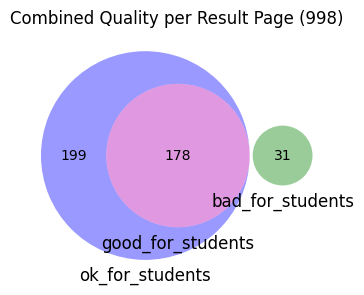

In [328]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

columns = ["good_for_students", "bad_for_students", "ok_for_students"]

plt.figure(figsize=(4, 4))
venn3(
    [set(results_sources[results_sources[column]].index) for column in columns],
    set_labels=columns,
)
plt.title(f"Combined Quality per Result Page ({len(results_sources)})")
plt.show()

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '98'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0,

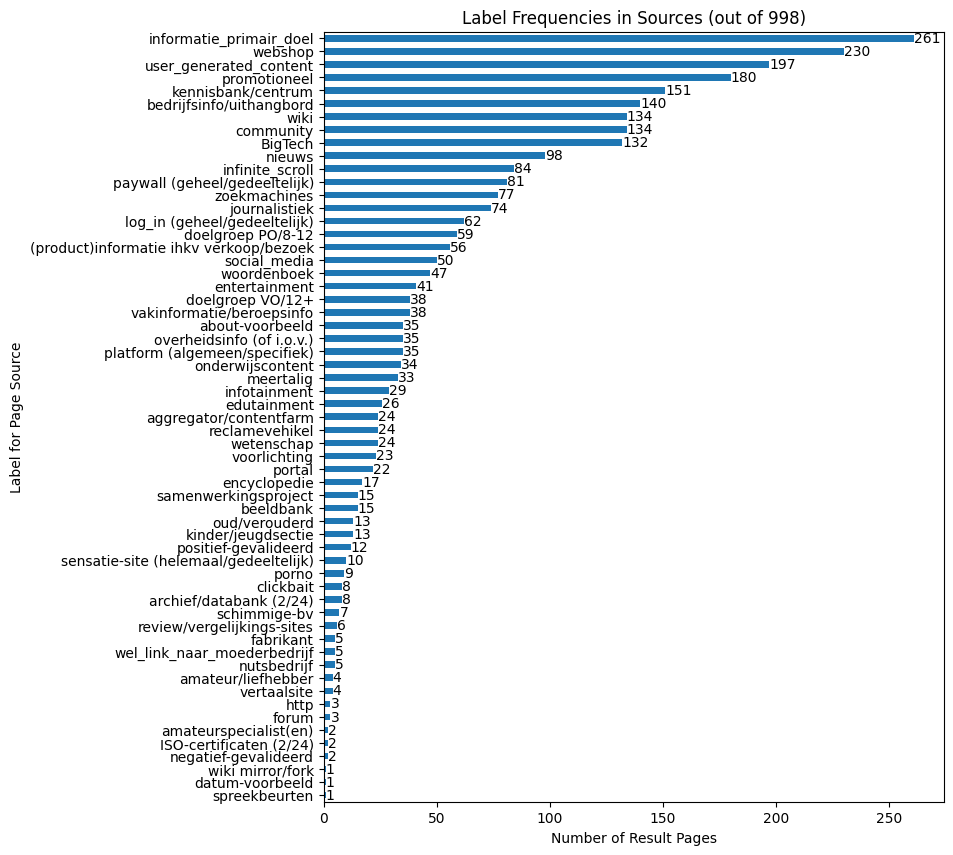

In [329]:
column = "Vrije labels bron/onderwerp"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '98'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '140'),
 Text(0, 0, '151'),
 Text(0, 0, '180'),
 Text(0, 0, '197'),
 Text(0, 0, '230'),
 Text(0, 0, '261')]

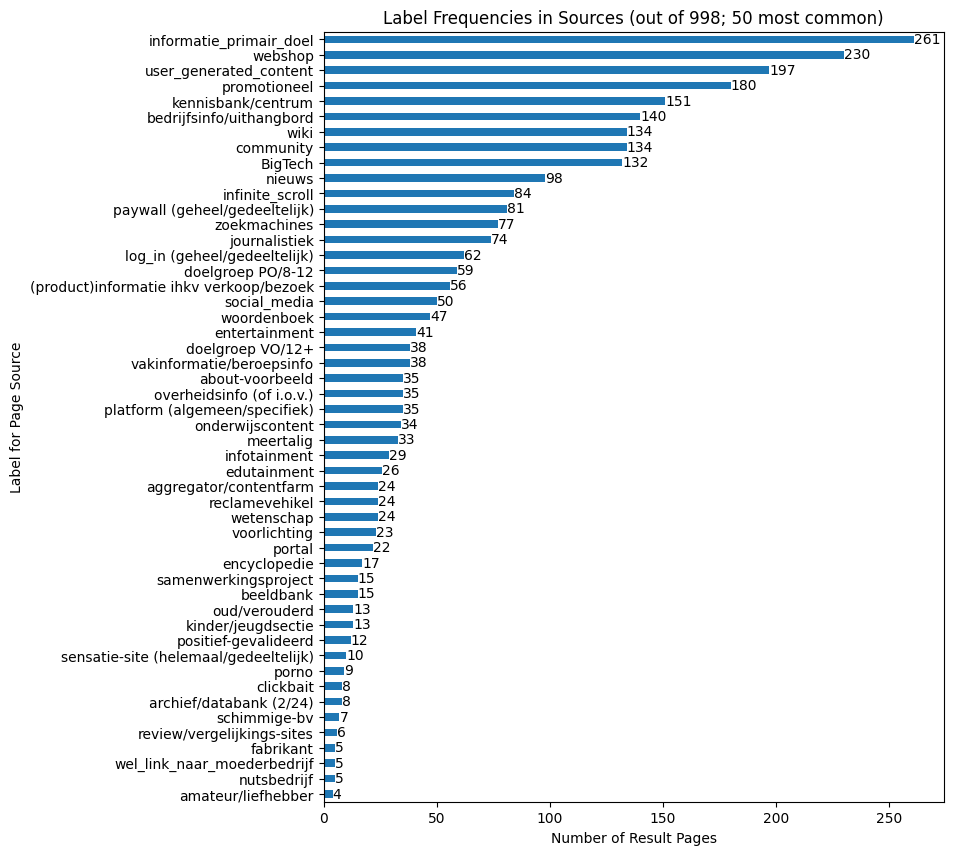

In [330]:
k = 50

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '98'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '140'),
 Text(0, 0, '151'),
 Text(0, 0, '180'),
 Text(0, 0, '197'),
 Text(0, 0, '230'),
 Text(0, 0, '261')]

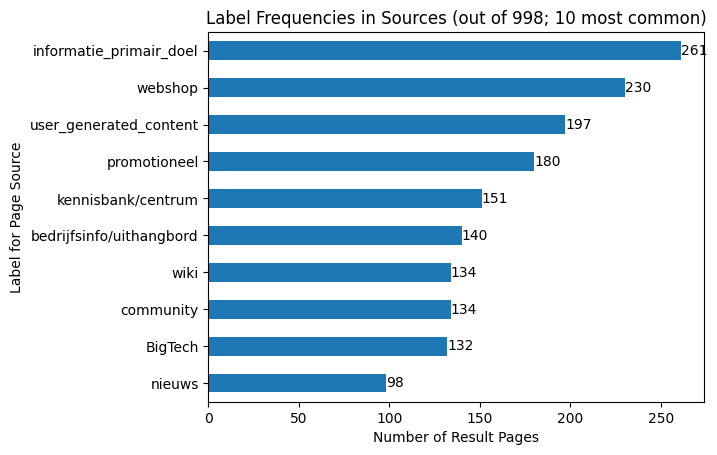

In [331]:
k = 10

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
    )
)

ax.bar_label(ax.containers[0])

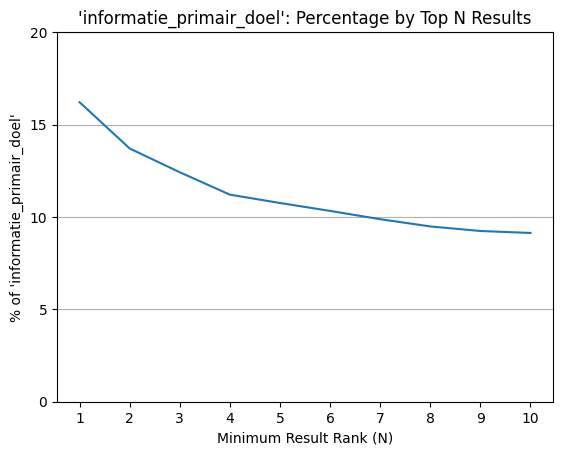

In [332]:
counts: dict[int, float] = {}
category = "informatie_primair_doel"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 25, 5),
    legend=False,
).grid(axis="y")

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

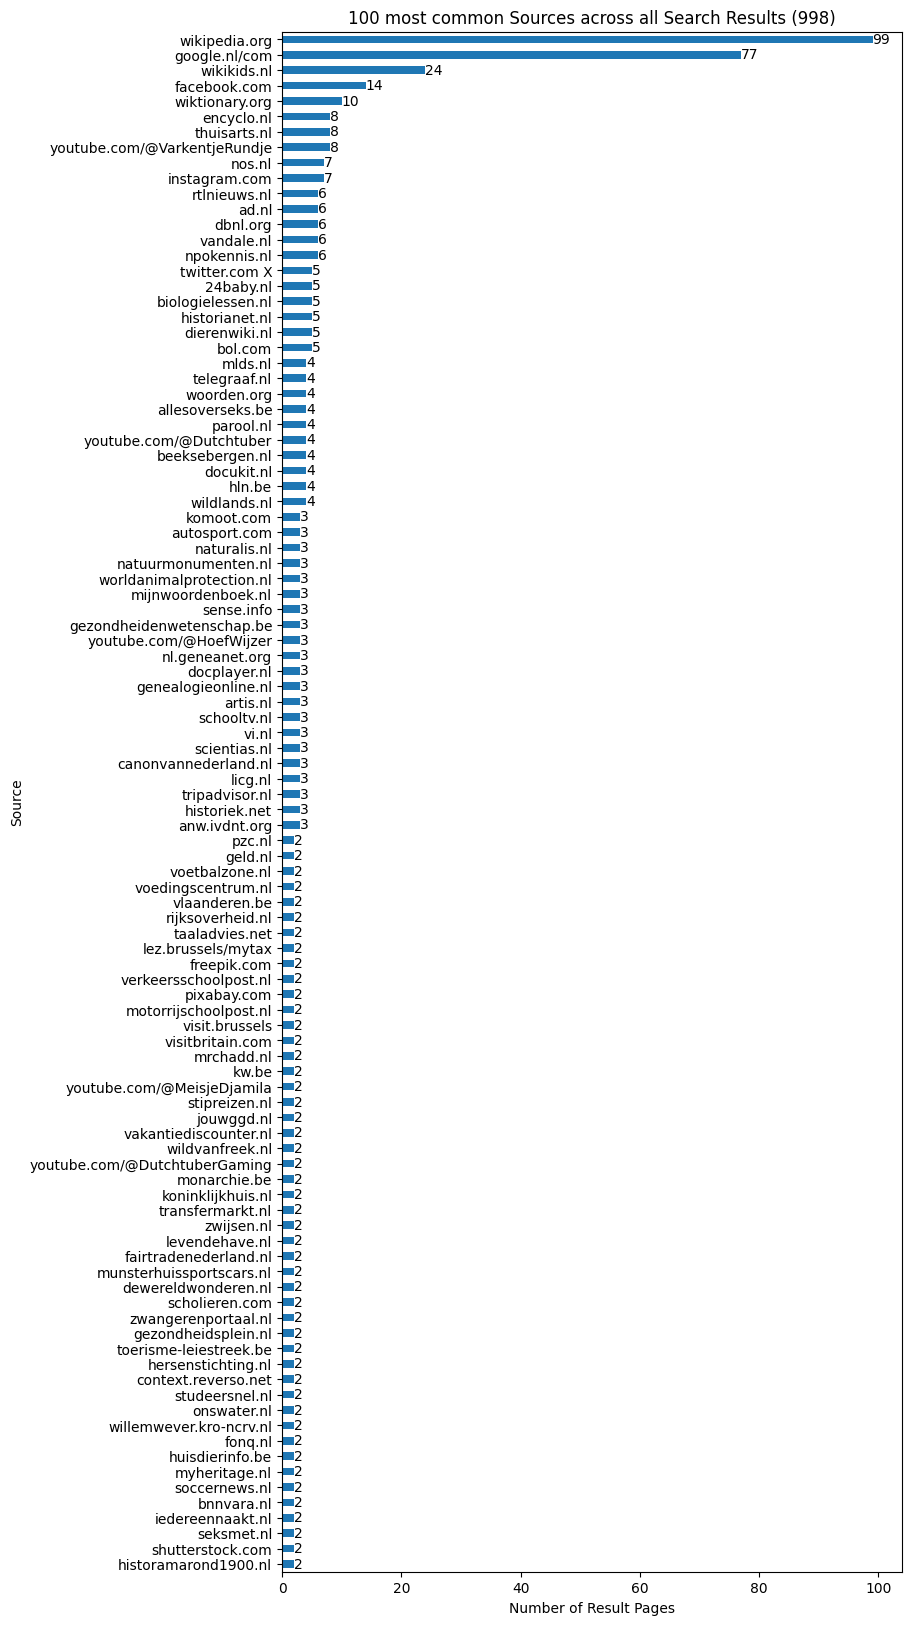

In [333]:
k = 100

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

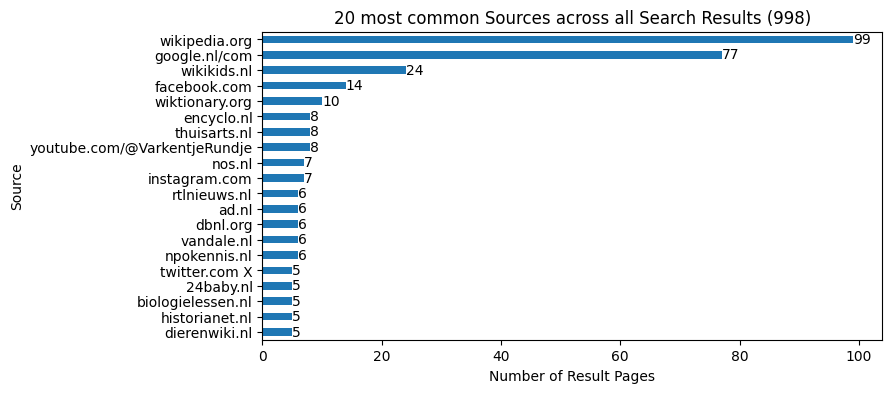

In [334]:
k = 20

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

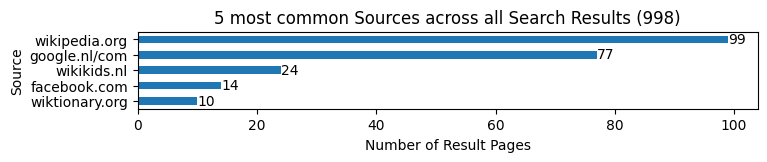

In [335]:
k = 5

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '53'),
 Text(0, 0, '83')]

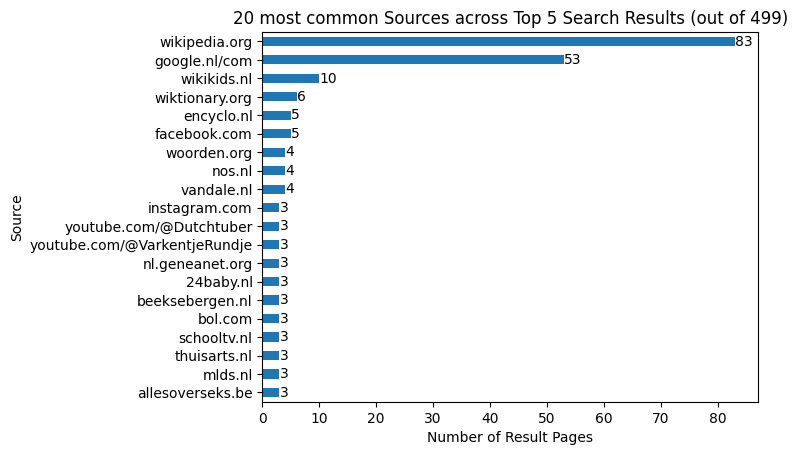

In [336]:
n = 5
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        # figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

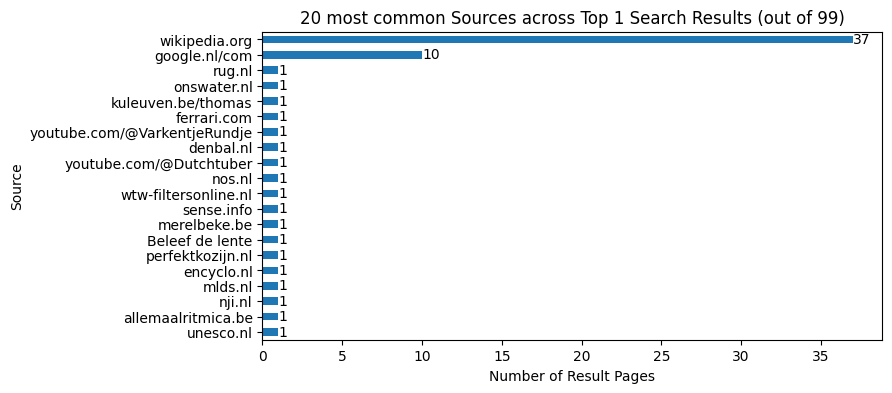

In [337]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

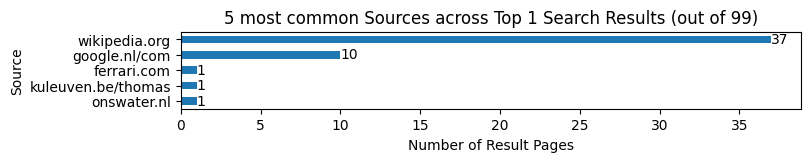

In [338]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 5

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

In [339]:
# wikikids.nl results never appears on first rank:

results.loc[(results["Bronnen DB"] == ("wikikids.nl")) & (results["Ranking"] <= 1)]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Relevant?, vrije tags page, Soort Resultaat, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Ranking vrije labels, Bron: Vrije labels, Bron: doel, Trackers, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, OnderzoekNr, Query: Video Schooltv, Created by, Bron-Status, Ranking]
Index: []

[0 rows x 26 columns]

[Text(0, 0, '1'), Text(0, 0, '12'), Text(0, 0, '23'), Text(0, 0, '26')]

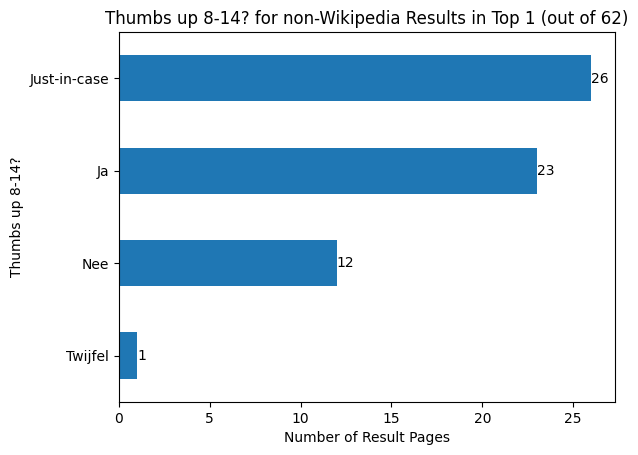

In [340]:
niet_wikipedia_rank_1 = results_sources.loc[
    (results["Bronnen DB"] != ("wikipedia.org")) & (results["Ranking"] <= 1)
]
ax = (
    niet_wikipedia_rank_1["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs up 8-14? for non-Wikipedia Results in Top 1 (out of {len(niet_wikipedia_rank_1)})",
        xlabel="Number of Result Pages",
    )
)
ax.bar_label(ax.containers[0])

### Result Types (Informativeness)

In [341]:
from collections import defaultdict


column = "Soort Resultaat"

values = results_sources[column].unique()

counts = (
    results_sources.groupby("Query")
    .value_counts(subset=[column], normalize=True)
    .unstack(level=column)
)

counts

Soort Resultaat                             informatief  navigational  \
Query                                                                   
De gouverneur van limburg                      1.000000           NaN   
De smurfen                                     0.500000      0.100000   
Dierentuin                                     1.000000           NaN   
Ezel                                           0.700000           NaN   
Hoe komen straatkinderen aan eten              1.000000           NaN   
...                                                 ...           ...   
welken gebouwen zijn er in West-Vlaanderen     0.800000      0.200000   
westerschelde waternoodsramp                   0.900000      0.100000   
wist je dat?                                   1.000000           NaN   
zebra                                          0.636364      0.272727   
zebrahaai                                      0.600000      0.300000   

Soort Resultaat                             transactional  
Query                                                      
De gouverneur van limburg                             NaN  
De smurfen                                       0.400000  
Dierentuin                                            NaN  
Ezel                                             0.300000  
Hoe komen straatkinderen aan eten                     NaN  
...                                                   ...  
welken gebouwen zijn er in West-Vlaanderen            NaN  
westerschelde waternoodsramp                          NaN  
wist je dat?                                          NaN  
zebra                                            0.090909  
zebrahaai                                        0.100000  

[100 rows x 3 columns]

In [342]:
counts.columns

Index(['informatief', 'navigational', 'transactional'], dtype='object', name='Soort Resultaat')

In [343]:
width = 120

for col in counts.columns:
    print("=" * 20 + col + "=" * 20)
    with pd.option_context("display.width", width):
        print(counts.sort_values(by=col, ascending=False))
    print("=" * width)

====================informatief====================
Soort Resultaat                                     informatief  navigational  transactional
Query                                                                                       
De gouverneur van limburg                                   1.0           NaN            NaN
welke stammen zijn er in sierra leone                       1.0           NaN            NaN
wat is een foetus?                                          1.0           NaN            NaN
elektronen                                                  1.0           NaN            NaN
wat is een begin aanhaling                                  1.0           NaN            NaN
...                                                         ...           ...            ...
post moter                                                  NaN      0.100000       0.900000
stamboom  familie                                           NaN      1.000000            NaN
telefoon          

[Text(0, 0, '141'), Text(0, 0, '165'), Text(0, 0, '692')]

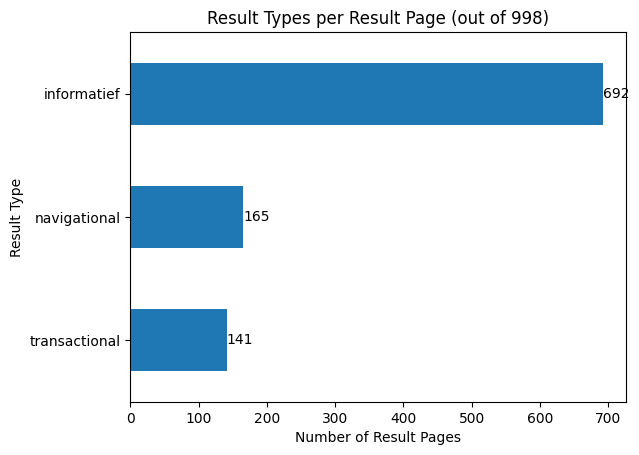

In [344]:
column = "Soort Resultaat"

ax = (
    results[column]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Result Type",
    )
)
ax.bar_label(ax.containers[0])

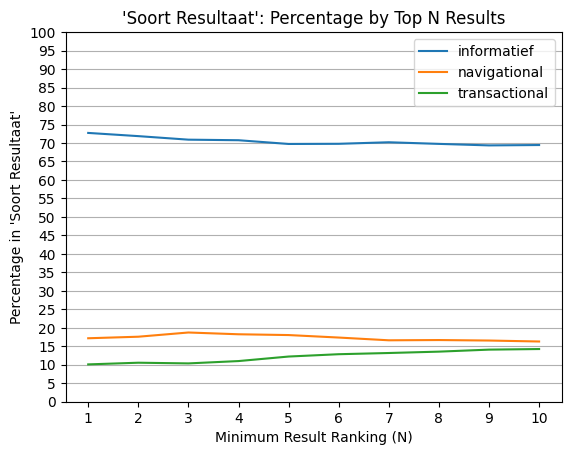

In [345]:
value_counts: dict = {}


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 105, 5),
    legend=True,
).grid(axis="y")

### Result Relevance

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '43'),
 Text(0, 0, '120'),
 Text(0, 0, '832')]

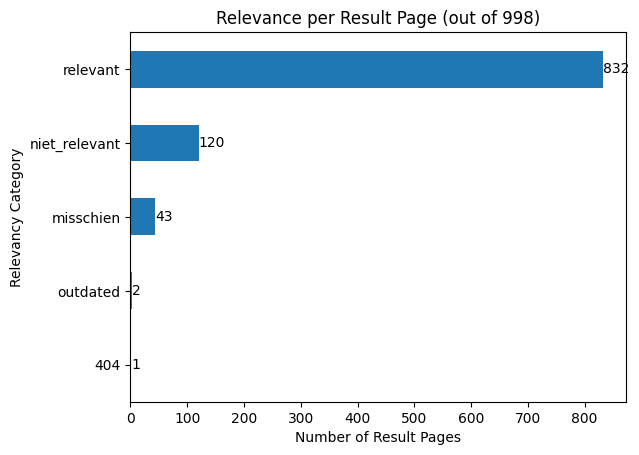

In [346]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Relevancy Category",
    )
)
ax.bar_label(ax.containers[0])

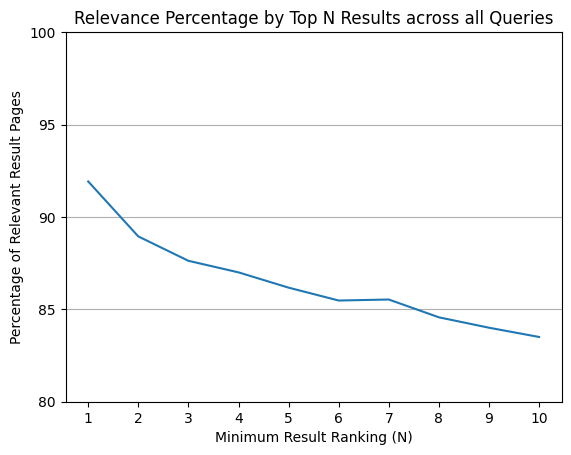

In [347]:
counts: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    counts[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(counts.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/1192633478.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


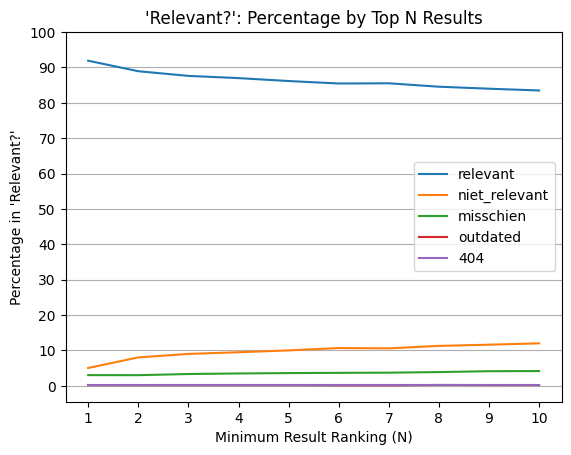

In [348]:
value_counts: dict = {}

column = "Relevant?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[:k]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 101, 10),
    legend=True,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '10'),
 Text(0, 0, '57'),
 Text(0, 0, '293'),
 Text(0, 0, '302'),
 Text(0, 0, '336')]

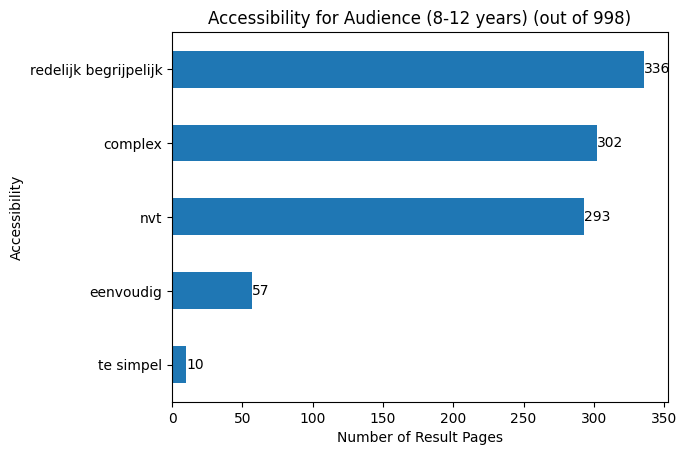

In [349]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

### Results Commerciality

[Text(0, 0, '48'), Text(0, 0, '408'), Text(0, 0, '542')]

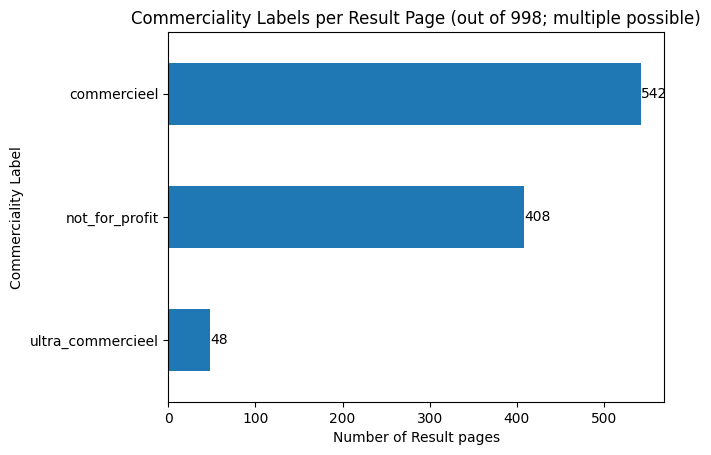

In [350]:
ax = (
    results_sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels per Result Page (out of {len(results_sources)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '17'), Text(0, 0, '226'), Text(0, 0, '256')]

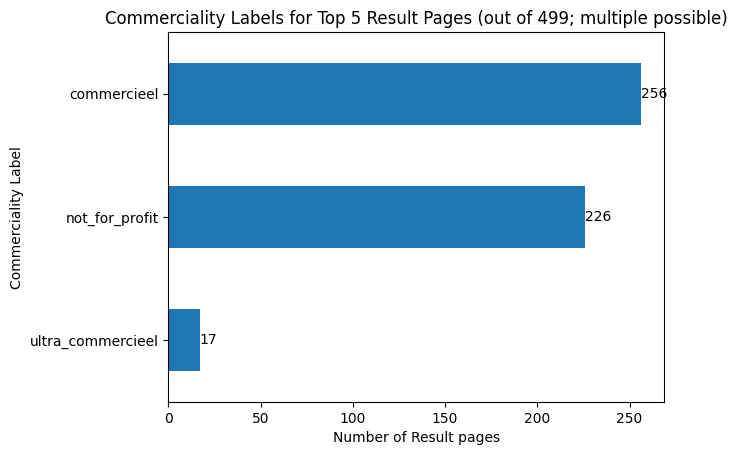

In [351]:
n = 5
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '36'), Text(0, 0, '62')]

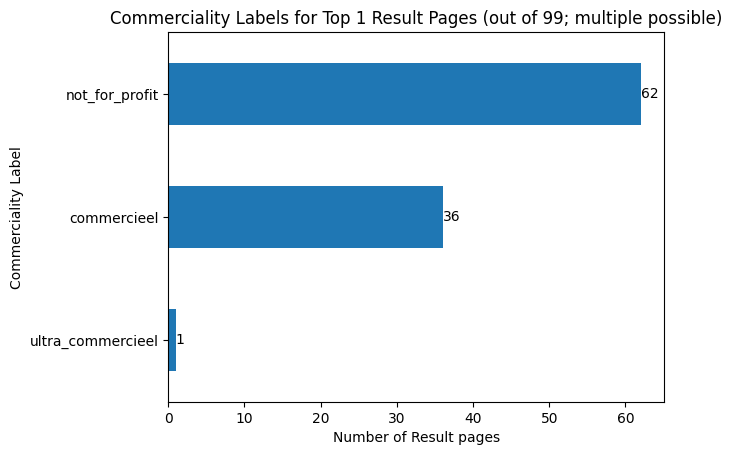

In [352]:
n = 1
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)}; multiple possible)",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

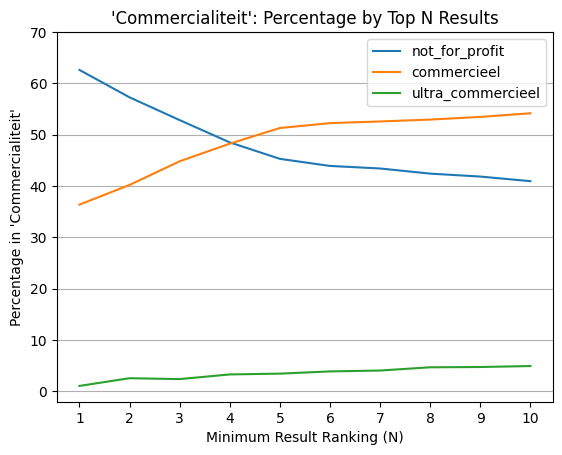

In [353]:
value_counts: dict = {}
column = "Commercialiteit"


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(0).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 75, 10),
    legend=True,
).grid(axis="y")

### Result Sectors

[Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '11'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '74'),
 Text(0, 0, '75'),
 Text(0, 0, '140'),
 Text(0, 0, '166'),
 Text(0, 0, '200')]

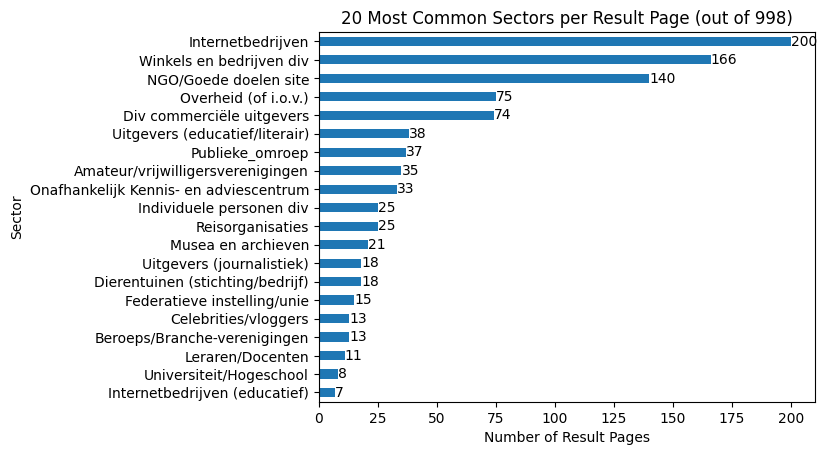

In [354]:
k = 20

ax = (
    results_sources["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '72'),
 Text(0, 0, '103'),
 Text(0, 0, '106')]

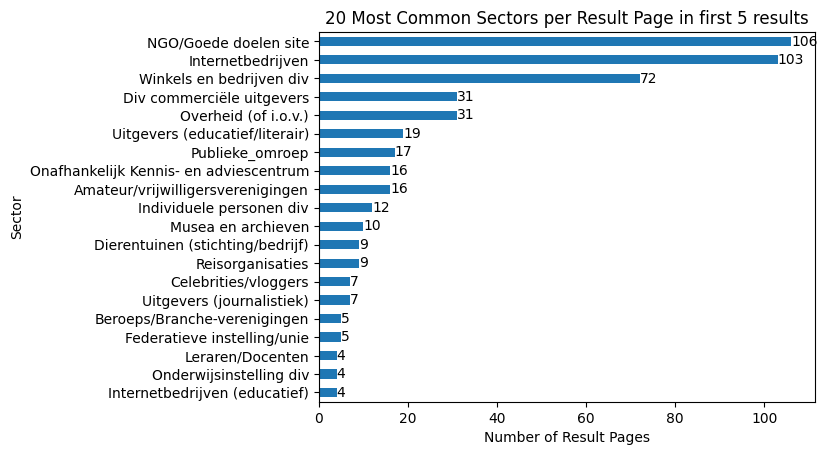

In [355]:
n = 5
k = 20
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '41')]

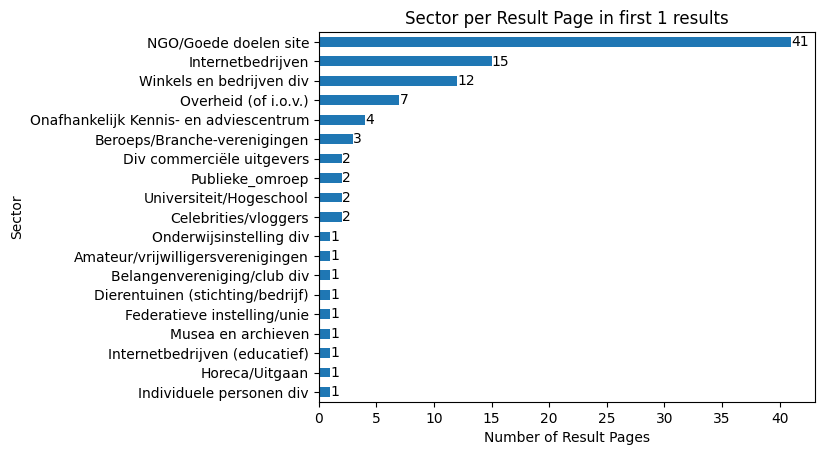

In [356]:
n = 1
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/978984602.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


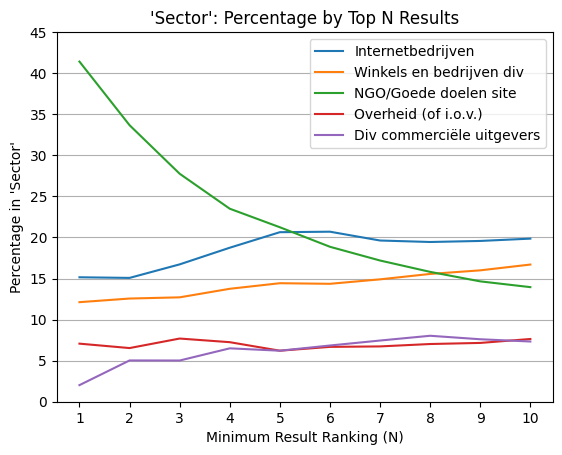

In [357]:
value_counts: dict = {}
k = 5
column = "Sector"

top_sectors = results_sources[column].value_counts()[:k].index

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[top_sectors]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="ffill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=True,
).grid(axis="y")

### Thumbs-Up

[Text(0, 0, '29'), Text(0, 0, '236'), Text(0, 0, '352'), Text(0, 0, '381')]

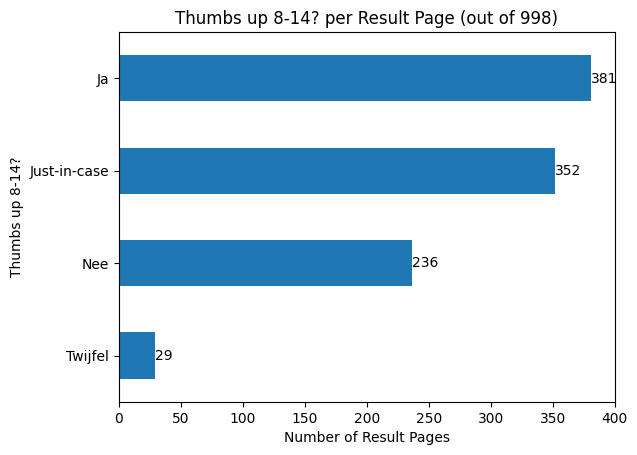

In [358]:
column = "Thumbs up 8-14?"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '8'), Text(0, 0, '101'), Text(0, 0, '176'), Text(0, 0, '214')]

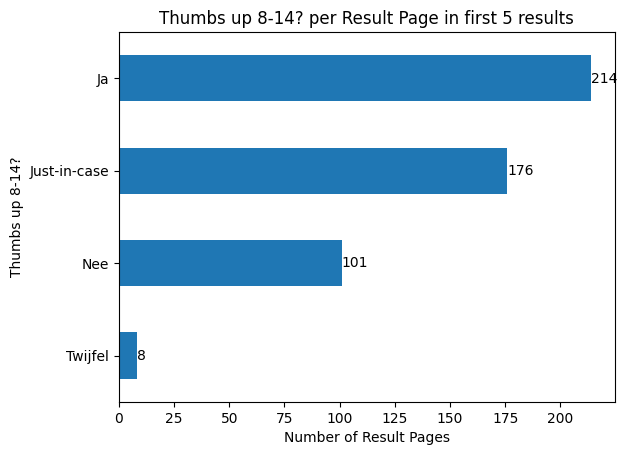

In [359]:
column = "Thumbs up 8-14?"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '12'), Text(0, 0, '26'), Text(0, 0, '60')]

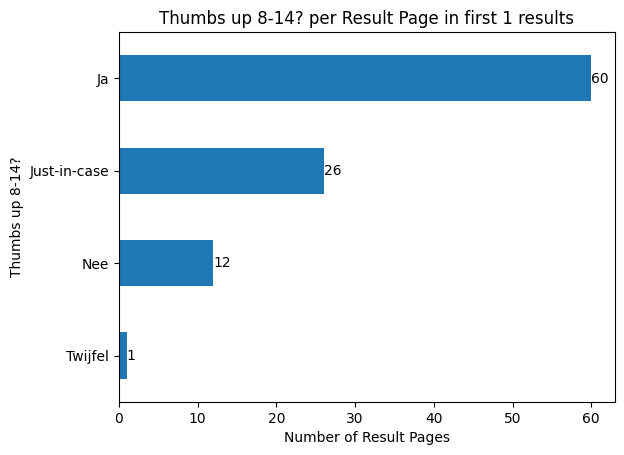

In [360]:
column = "Thumbs up 8-14?"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

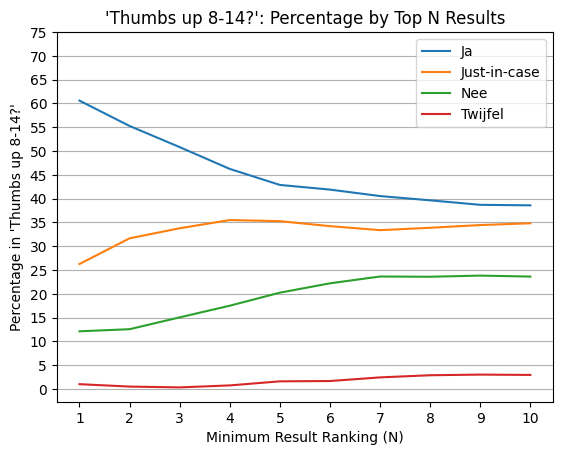

In [361]:
value_counts: dict = {}

categories = ["Ja", "Just-in-case"]
column = "Thumbs up 8-14?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 80, 5),
    legend=True,
).grid(axis="y")

### Goal

[Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '41'),
 Text(0, 0, '61'),
 Text(0, 0, '63'),
 Text(0, 0, '64'),
 Text(0, 0, '93'),
 Text(0, 0, '100'),
 Text(0, 0, '111'),
 Text(0, 0, '241')]

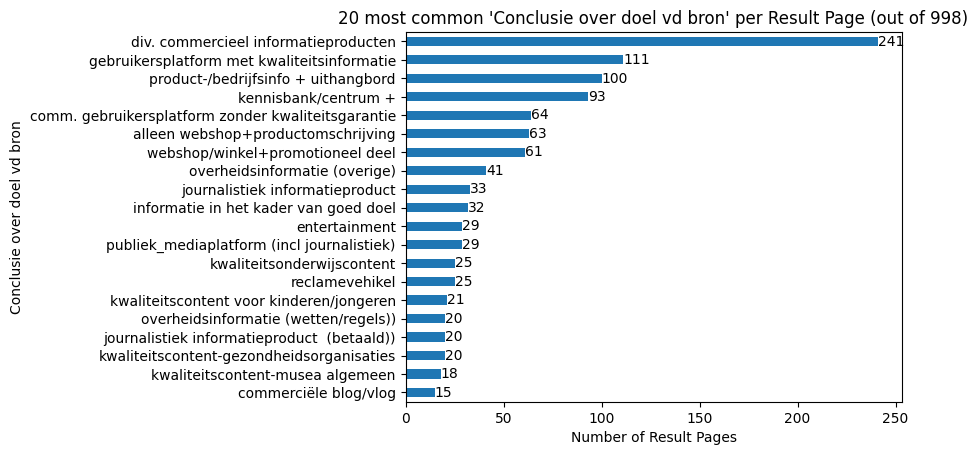

In [362]:
column = "Conclusie over doel vd bron"
k = 20

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most common '{column}' per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '28'),
 Text(0, 0, '38'),
 Text(0, 0, '45'),
 Text(0, 0, '89'),
 Text(0, 0, '124')]

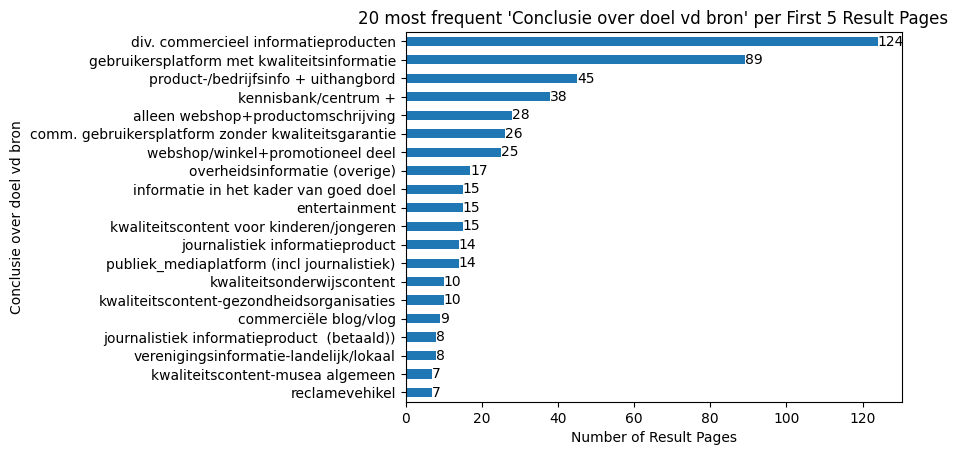

In [363]:
column = "Conclusie over doel vd bron"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '17'),
 Text(0, 0, '37')]

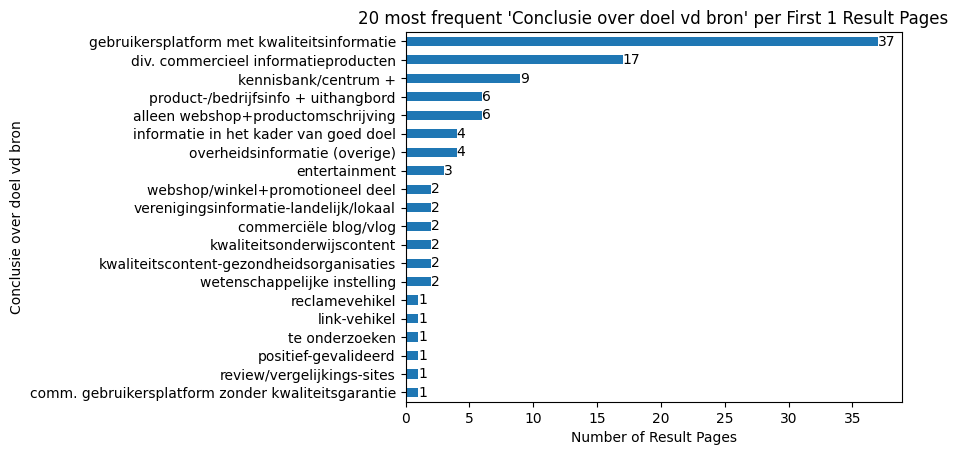

In [364]:
column = "Conclusie over doel vd bron"
n = 1
k = 20

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        # figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

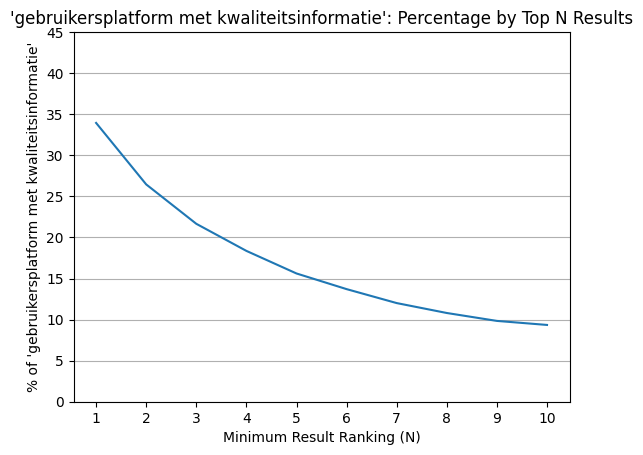

In [365]:
counts: dict[int, float] = {}
category = "gebruikersplatform met kwaliteitsinformatie"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=False,
).grid(axis="y")

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '27'),
 Text(0, 0, '53'),
 Text(0, 0, '125'),
 Text(0, 0, '332'),
 Text(0, 0, '423')]

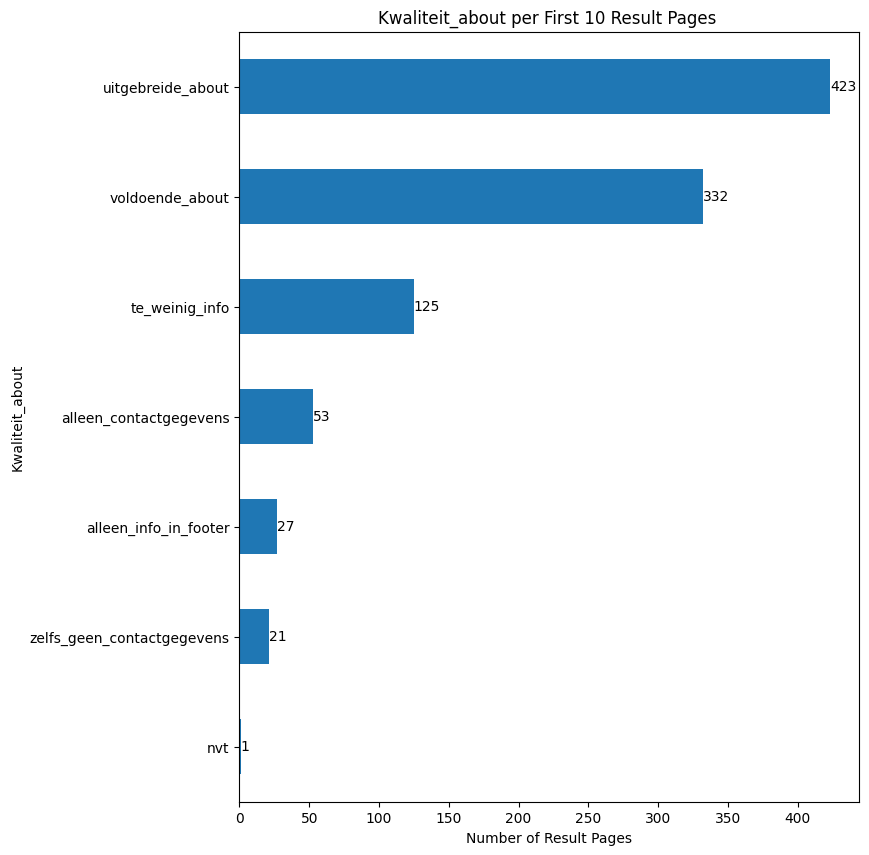

In [366]:
column = "Kwaliteit_about"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages ",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Ads

In [367]:
column = "Reclame"
n = 5

categories = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-n:]
).index
categories

Index(['over_the_top_ads', 'limited_ads', 'many_ads', 'none',
       'company_promotion'],
      dtype='object', name='Reclame')

[Text(0, 0, '39'),
 Text(0, 0, '76'),
 Text(0, 0, '200'),
 Text(0, 0, '357'),
 Text(0, 0, '389')]

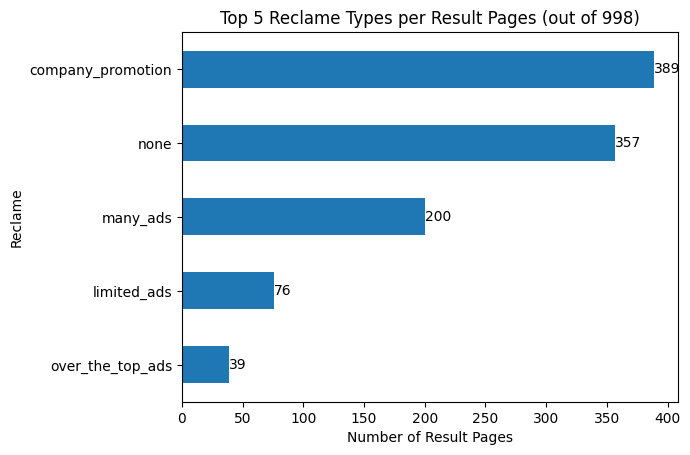

In [368]:
ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[categories]
    .plot(
        kind="barh",
        title=f"Top {n} {column} Types per Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/331480954.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


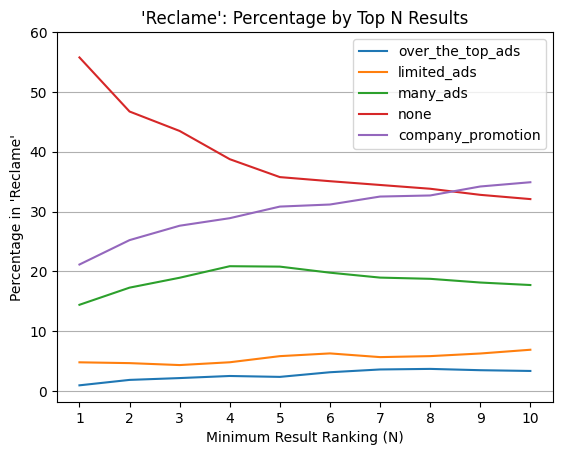

In [369]:
column = "Reclame"
n = 5

value_counts: dict = {}


for rank in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= rank]
    value_counts[rank] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[categories]
        * 100
    )

pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 61, 10),
    legend=True,
).grid(axis="y")

[Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '32'),
 Text(0, 0, '114'),
 Text(0, 0, '169'),
 Text(0, 0, '196')]

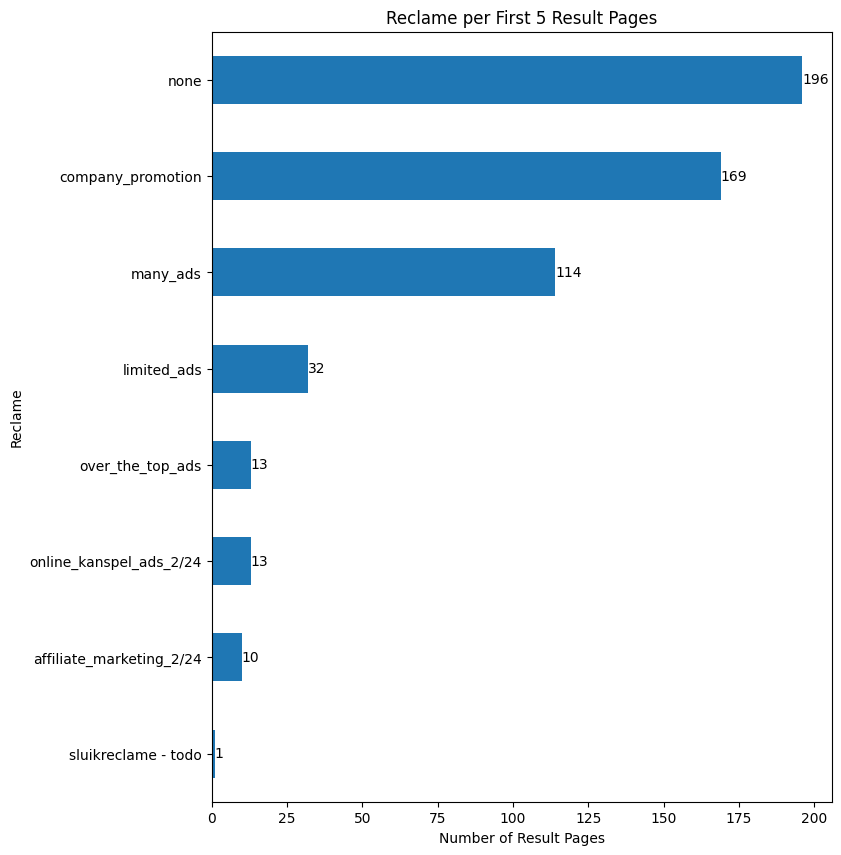

In [370]:
column = "Reclame"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '58')]

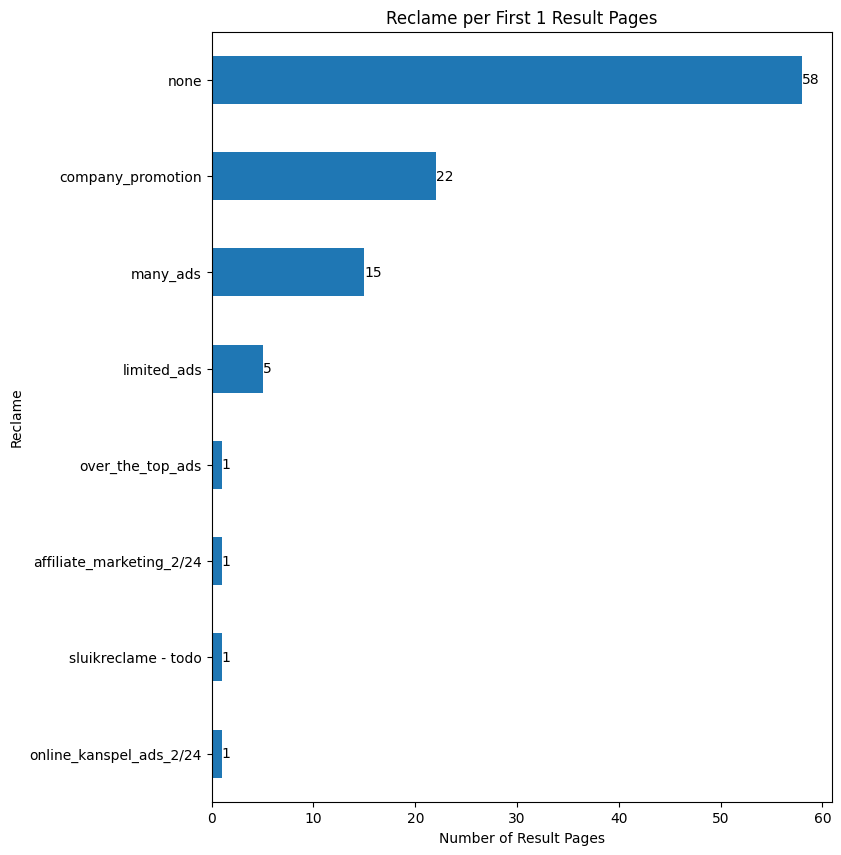

In [371]:
column = "Reclame"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

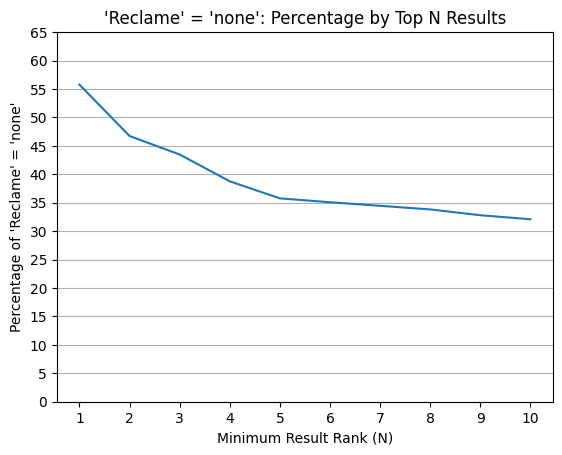

In [372]:
counts: dict[int, float] = {}
category = "none"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 70, 5),
    legend=False,
).grid(axis="y")

## Sources

### Commerciality

[Text(0, 0, '15'), Text(0, 0, '191'), Text(0, 0, '336')]

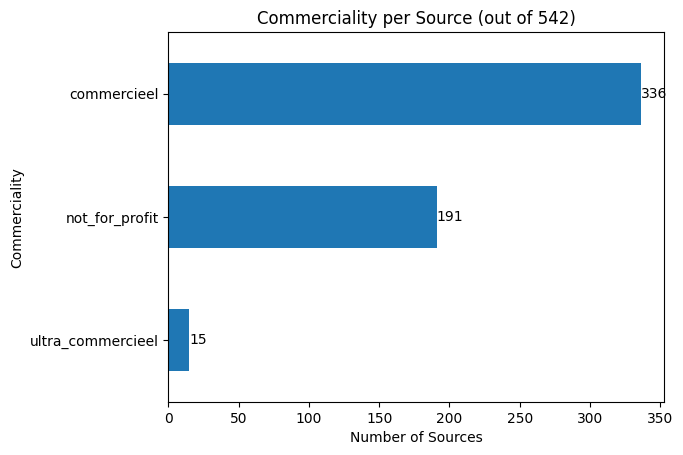

In [373]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '55'),
 Text(0, 0, '73'),
 Text(0, 0, '145')]

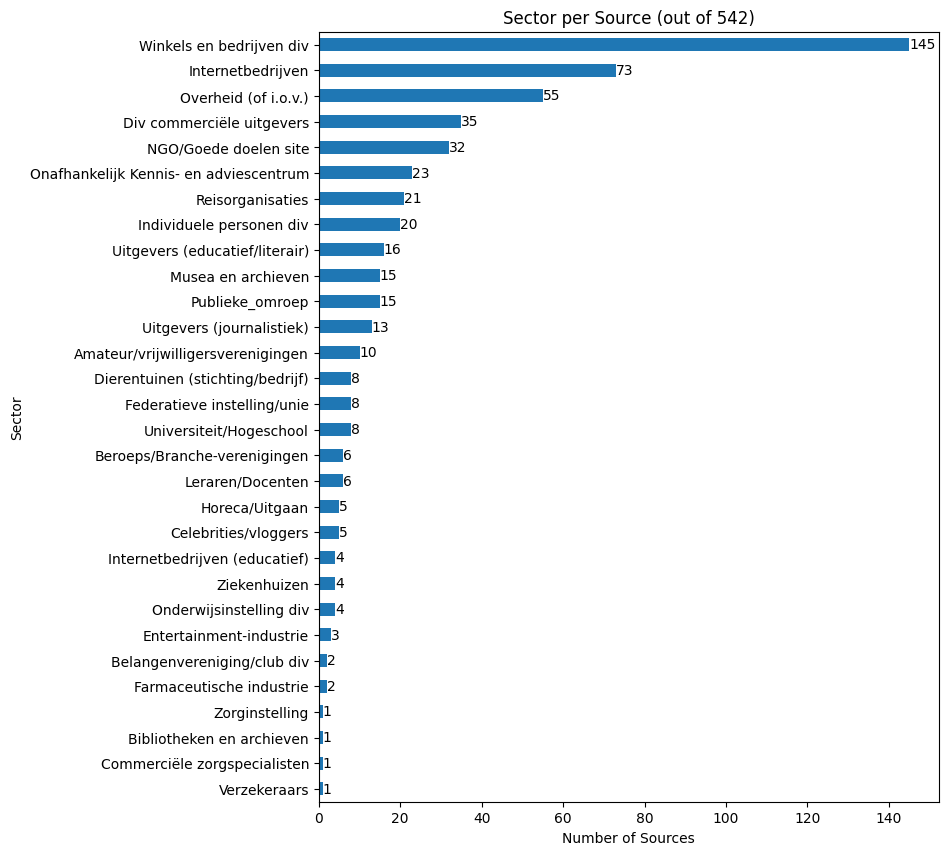

In [374]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '45'),
 Text(0, 0, '53'),

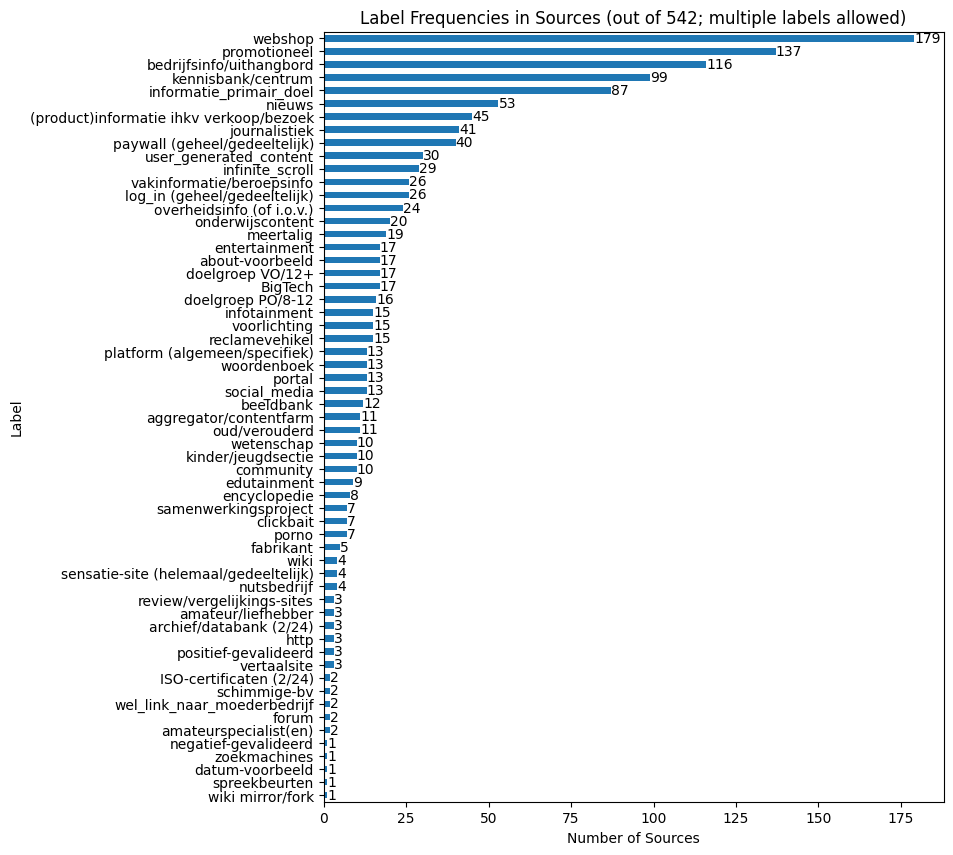

In [375]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 542)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

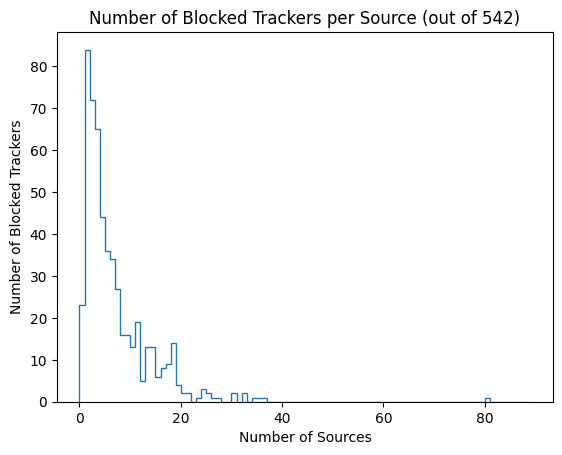

In [376]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '18'),
 Text(0, 0, '287'),
 Text(0, 0, '43'),
 Text(0, 0, '57'),
 Text(0, 0, '162'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

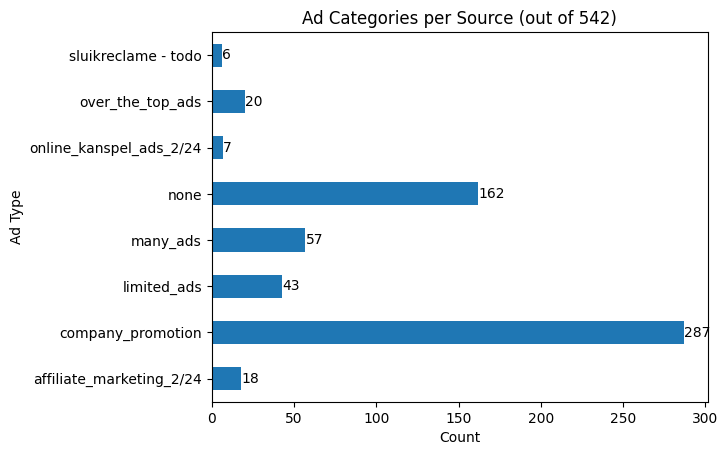

In [377]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '25'),
 Text(0, 0, '33'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '63'),
 Text(0, 0, '83'),
 Text(0, 0, '85')]

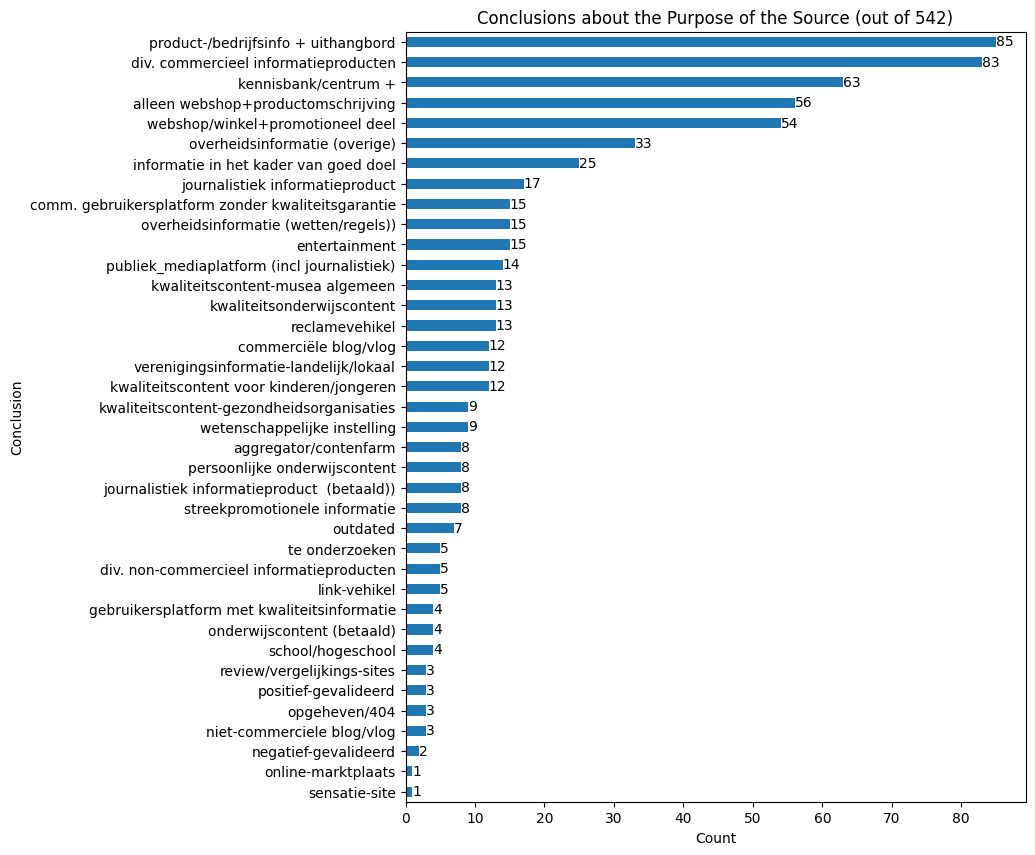

In [378]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '20'), Text(0, 0, '166'), Text(0, 0, '176'), Text(0, 0, '180')]

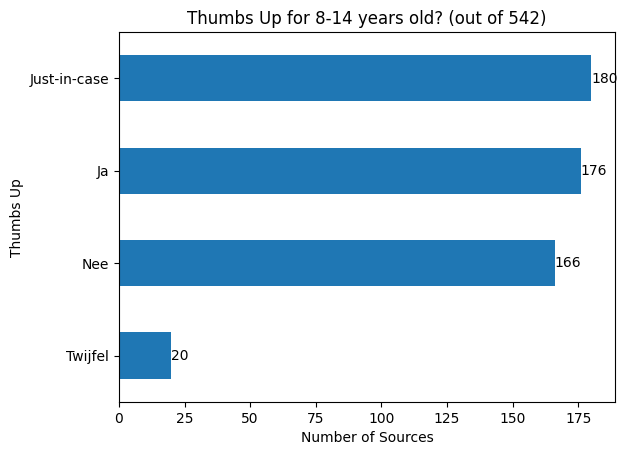

In [379]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '35'),
 Text(0, 0, '63'),
 Text(0, 0, '204'),
 Text(0, 0, '214')]

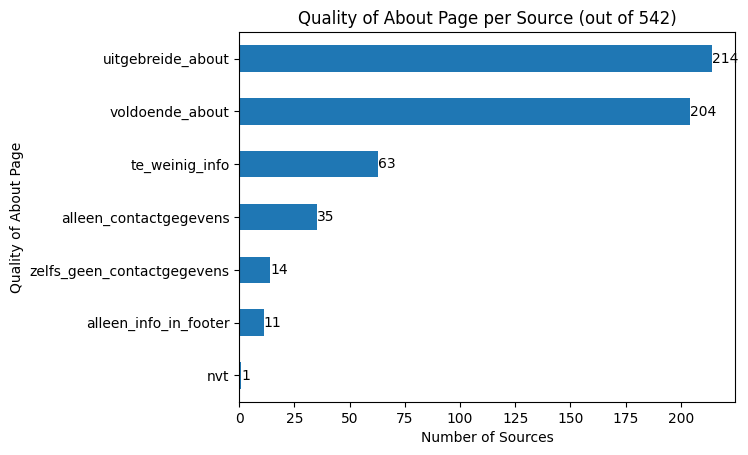

In [380]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

### Doelgroep vs. Thumbs-Up

In [381]:
doelgroep_po = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep PO/8-12"))
]
doelgroep_po

URL Domein  \
Name                                                                      
canonvannederland.nl                  https://www.canonvannederland.nl/   
dierenwiki.nl                                    https://dierenwiki.nl/   
dierpedia.nl                                      https://dierpedia.nl/   
docukit.nl                                      https://www.docukit.nl/   
natgeojunior.nl                             https://www.natgeojunior.nl   
rangerclub.be                                     https://rangerclub.be   
rangers.wwf.nl                                  https://rangers.wwf.nl/   
schoolsupport.nl                               https://schoolsupport.nl   
schooltv.nl                                        https://schooltv.nl/   
superspreekbeurt.nl                         https://superspreekbeurt.nl   
taal-oefenen.nl                             https://www.taal-oefenen.nl   
weetwatjeviert.nl                            https://weetwatjeviert.nl/   
wikikids.nl                                        https://wikikids.nl/   
wildvanfreek.nl                             https://www.wildvanfreek.nl   
willemwever.kro-ncrv.nl                https://willemwever.kro-ncrv.nl/   
youtube.com/@VarkentjeRundje  https://www.youtube.com/@VarkentjeRundje/   

                                 Onderwerpen  \
Name                                           
canonvannederland.nl            geschiedenis   
dierenwiki.nl                         dieren   
dierpedia.nl                          dieren   
docukit.nl                               NaN   
natgeojunior.nl                          NaN   
rangerclub.be                 dieren, natuur   
rangers.wwf.nl                dieren, natuur   
schoolsupport.nl                         NaN   
schooltv.nl                              NaN   
superspreekbeurt.nl                      NaN   
taal-oefenen.nl                          NaN   
weetwatjeviert.nl                        NaN   
wikikids.nl                              NaN   
wildvanfreek.nl                       dieren   
willemwever.kro-ncrv.nl                  NaN   
youtube.com/@VarkentjeRundje             NaN   

                                                         Sector  \
Name                                                              
canonvannederland.nl                         Musea en archieven   
dierenwiki.nl                                 Internetbedrijven   
dierpedia.nl                                  Internetbedrijven   
docukit.nl                       Uitgevers (educatief/literair)   
natgeojunior.nl                  Uitgevers (educatief/literair)   
rangerclub.be                    Uitgevers (educatief/literair)   
rangers.wwf.nl                            NGO/Goede doelen site   
schoolsupport.nl                 Uitgevers (educatief/literair)   
schooltv.nl                                     Publieke_omroep   
superspreekbeurt.nl                           Internetbedrijven   
taal-oefenen.nl                  Uitgevers (educatief/literair)   
weetwatjeviert.nl                            Musea en archieven   
wikikids.nl                   Amateur/vrijwilligersverenigingen   
wildvanfreek.nl                  Uitgevers (educatief/literair)   
willemwever.kro-ncrv.nl                         Publieke_omroep   
youtube.com/@VarkentjeRundje                    Publieke_omroep   

                                        Reclame  uBlocked trackers  \
Name                                                                 
canonvannederland.nl                       none                  4   
dierenwiki.nl                          many_ads                  3   
dierpedia.nl                        limited_ads                  7   
docukit.nl                    company_promotion                  1   
natgeojunior.nl               company_promotion                  2   
rangerclub.be                 company_promotion                  5   
rangers.wwf.nl                company_promotion                  3   
schoolsu

In [382]:
doelgroep_vo = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep VO/12+"))
]
doelgroep_vo

URL Domein  \
Name                                                                 
aljevragen.nl                            https://www.aljevragen.nl   
allesoverseks.be                     https://www.allesoverseks.be/   
biologielessen.nl                       https://biologielessen.nl/   
canonvannederland.nl             https://www.canonvannederland.nl/   
cyberpoli.nl                             https://www.cyberpoli.nl/   
dierenwiki.nl                               https://dierenwiki.nl/   
dierpedia.nl                                 https://dierpedia.nl/   
examenoverzicht.nl                 https://www.examenoverzicht.nl/   
jouwggd.nl                                 https://www.jouwggd.nl/   
mlochemie.nl                              https://www.mlochemie.nl   
mrchadd.nl                                 https://www.mrchadd.nl/   
schooltv.nl                                   https://schooltv.nl/   
seksualiteit.nl                            https://seksualiteit.nl   
sense.info                                      https://sense.info   
surinamewebquest.nl                http://www.surinamewebquest.nl/   
wetenschapsschool.nl             https://www.wetenschapsschool.nl/   
youtube.com/@WouterRenkema  https://www.youtube.com/@WouterRenkema   

                                    Onderwerpen  \
Name                                              
aljevragen.nl                               NaN   
allesoverseks.be                        lichaam   
biologielessen.nl                       lichaam   
canonvannederland.nl               geschiedenis   
cyberpoli.nl                gezondheid, lichaam   
dierenwiki.nl                            dieren   
dierpedia.nl                             dieren   
examenoverzicht.nl                          NaN   
jouwggd.nl                  gezondheid, lichaam   
mlochemie.nl                                NaN   
mrchadd.nl                                  NaN   
schooltv.nl                                 NaN   
seksualiteit.nl                         lichaam   
sense.info                              lichaam   
surinamewebquest.nl                         NaN   
wetenschapsschool.nl                        NaN   
youtube.com/@WouterRenkema                  NaN   

                                                            Sector  \
Name                                                                 
aljevragen.nl                                     Leraren/Docenten   
allesoverseks.be                              Overheid (of i.o.v.)   
biologielessen.nl                                 Leraren/Docenten   
canonvannederland.nl                            Musea en archieven   
cyberpoli.nl                Onafhankelijk Kennis- en adviescentrum   
dierenwiki.nl                                    Internetbedrijven   
dierpedia.nl                                     Internetbedrijven   
examenoverzicht.nl                               Internetbedrijven   
jouwggd.nl                             Federatieve instelling/unie   
mlochemie.nl                        Uitgevers (educatief/literair)   
mrchadd.nl                           Internetbedrijven (educatief)   
schooltv.nl                                        Publieke_omroep   
seksualiteit.nl             Onafhankelijk Kennis- en adviescentrum   
sense.info                                    Overheid (of i.o.v.)   
surinamewebquest.nl                               Leraren/Docenten   
wetenschapsschool.nl                              Leraren/Docenten   
youtube.com/@WouterRenkema                        Leraren/Docenten   

                                      Reclame  uBlocked trackers  \
Name                                                               
aljevragen.nl                     limited_ads                  7   
allesoverseks.be                         none                  3   
biologielessen.nl                        none                  1   
canonvannederland.nl                     none                  4   
cyberpoli.nl    

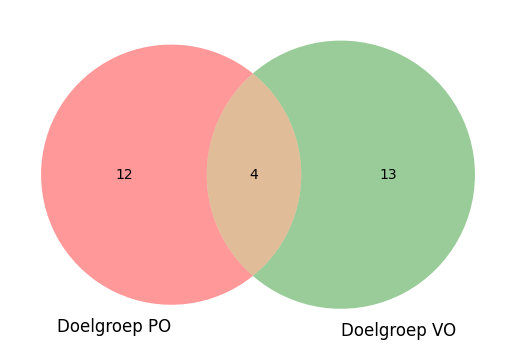

In [383]:
from matplotlib_venn import venn2

venn2(
    [set(doelgroep_po.index), set(doelgroep_vo.index)],
    set_labels=["Doelgroep PO", "Doelgroep VO"],
)

[Text(0, 0, '11'), Text(0, 0, '5')]

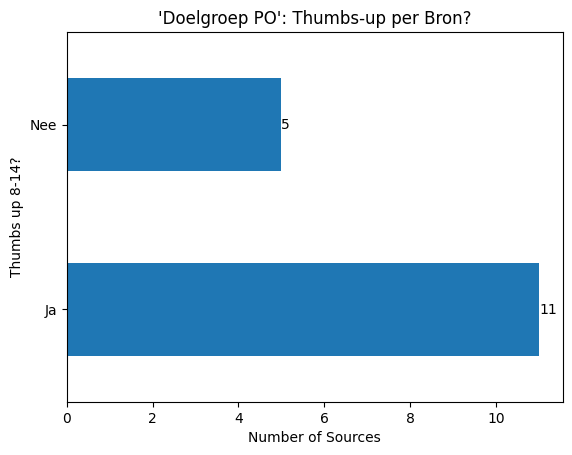

In [384]:
ax = (
    doelgroep_po["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep PO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'), Text(0, 0, '2'), Text(0, 0, '2')]

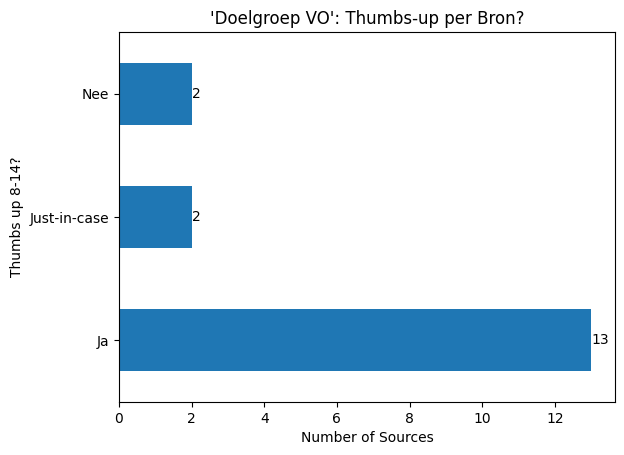

In [385]:
ax = (
    doelgroep_vo["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep VO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

### Top-level domains

In [386]:
sources["tld"] = sources["URL Domein"].str.split(".").str[-1].str.split("/").str[0]
sources["tld"].value_counts()

tld
nl                                 390
com                                 76
be                                  40
org                                 13
net                                  7
nu                                   3
brussels                             2
fr                                   2
n                                    1
gov                                  1
122                                  1
info                                 1
shop                                 1
gent                                 1
redirect                             1
do?ctx=46163,46173&anav=4154073      1
html                                 1
Name: count, dtype: int64

[Text(0, 0, '(128 / 390)'),
 Text(0, 0, '(6 / 76)'),
 Text(0, 0, '(27 / 40)'),
 Text(0, 0, '(7 / 13)'),
 Text(0, 0, '(3 / 7)')]

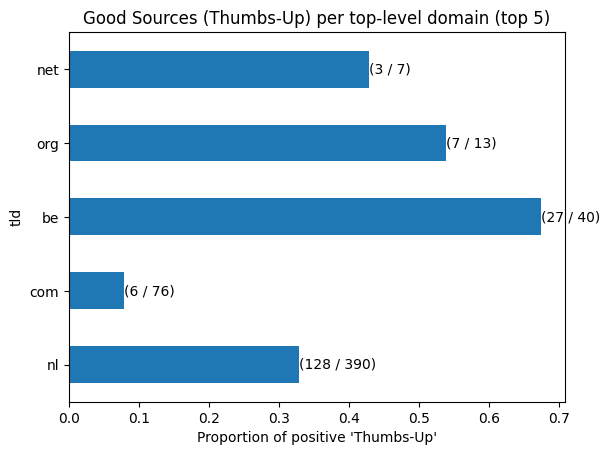

In [387]:
n = 5
tlds = pd.Series(sources["tld"].value_counts()[:n])

ja_counts = pd.Series(
    [
        len(sources.loc[(sources["tld"] == tld) & (sources["Thumbs up 8-14?"] == "Ja")])
        for tld in tlds.index
    ],
    index=tlds.index,
)
ja_counts
ax = (ja_counts / tlds).plot(
    kind="barh",
    title=f"Good Sources (Thumbs-Up) per top-level domain (top {n})",
    xlabel="Proportion of positive 'Thumbs-Up'",
    legend=False,
)

bar_labels = [
    f"({int(ja_counts[tld])} / { sources['tld'].value_counts()[tld]})"
    for tld in tlds.index
]
ax.bar_label(ax.containers[0], labels=bar_labels)

## Queries and Result Pages

### Ok/Good/Bad for Students

[Text(0, 0, '35'),
 Text(0, 0, '20'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '2'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

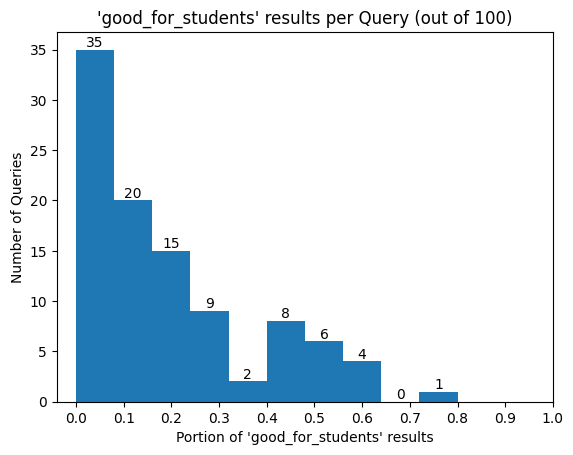

In [388]:
column = "good_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '83'),
 Text(0, 0, '12'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

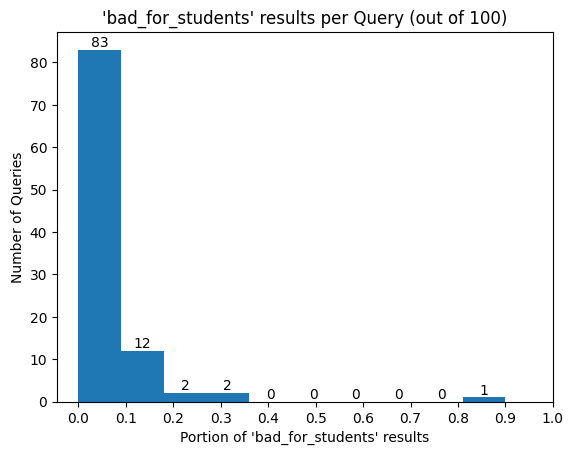

In [389]:
column = "bad_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '16'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '5'),
 Text(0, 0, '2')]

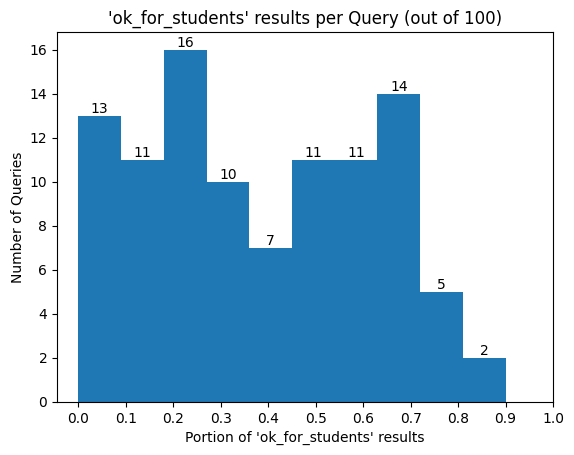

In [390]:
column = "ok_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

### Soort Resultaten Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/2519624949.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '22'),
 Text(0, 0, '25')]

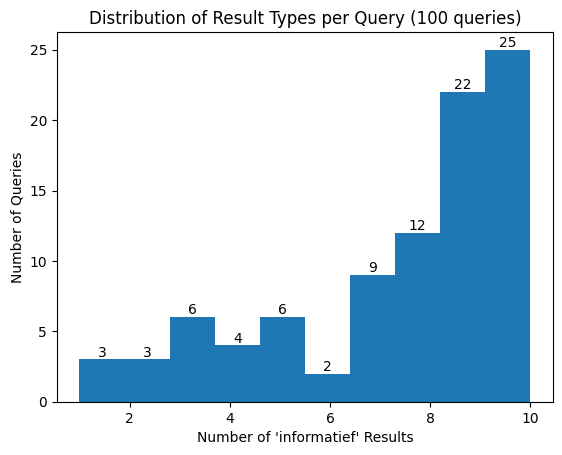

In [391]:
column = "Soort Resultaat"
value = "informatief"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/1416800553.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1')]

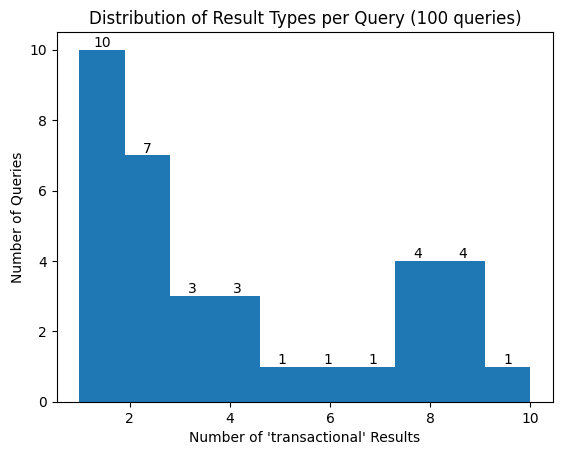

In [392]:
column = "Soort Resultaat"
value = "transactional"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/3201790118.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '29'),
 Text(0, 0, '15'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

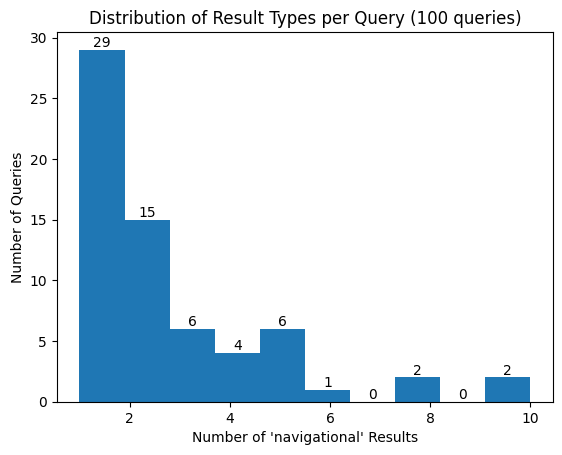

In [393]:
column = "Soort Resultaat"
value = "navigational"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Accessibility Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/3233662226.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '16'),
 Text(0, 0, '9'),
 Text(0, 0, '16'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

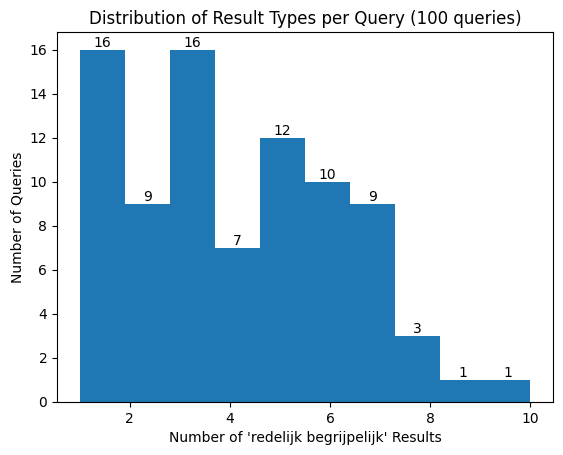

In [394]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "redelijk begrijpelijk"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_76520/1130612084.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

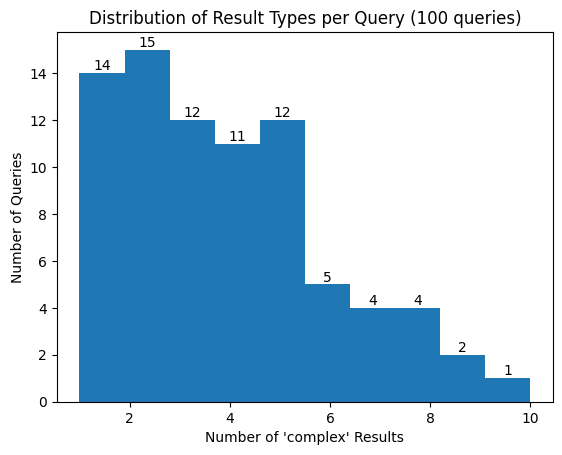

In [395]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "complex"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Age

Text(0, 0.5, 'Number of Queries')

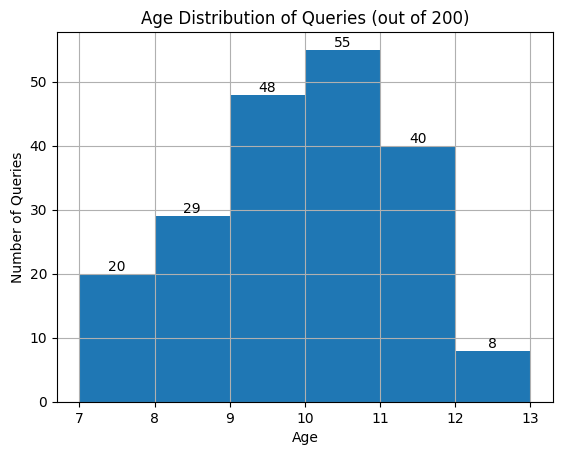

In [396]:
bins = range(all_queries["Leeftijd"].min(), all_queries["Leeftijd"].max() + 2)

hist = all_queries.hist(column="Leeftijd", bins=bins)
for ax in hist.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Number of Queries")
    ax.bar_label(ax.containers[0])
ax.title.set_text(f"Age Distribution of Queries (out of {len(all_queries)})")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Queries")

### Query Length

[Text(0, 0, '108'),
 Text(0, 0, '50'),
 Text(0, 0, '22'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

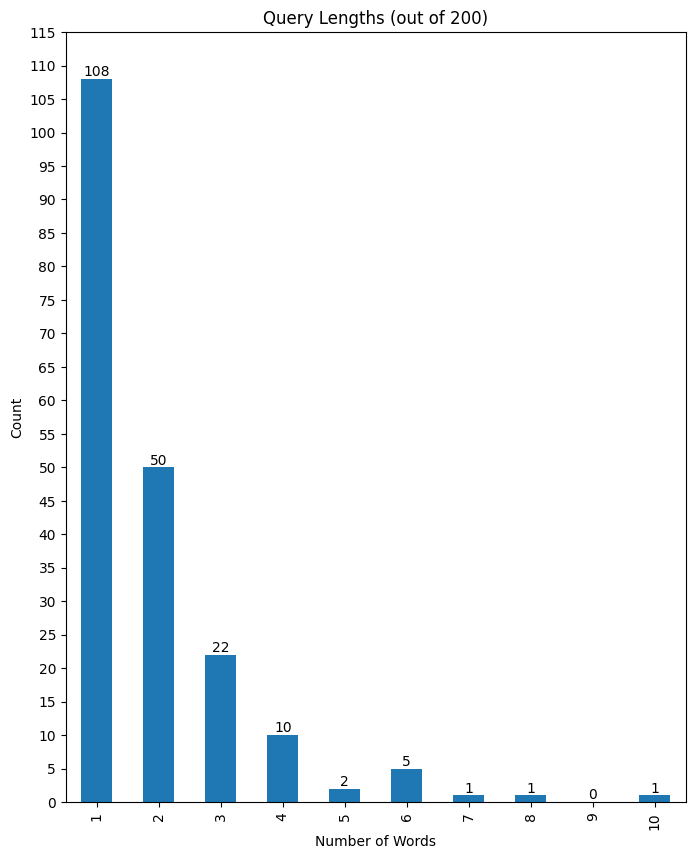

In [397]:
lengths = all_queries["Query"].str.strip().str.split().str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(all_queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 120, 5),
)
ax.bar_label(ax.containers[0])

### Query Type

[Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '36'),
 Text(0, 0, '55'),
 Text(0, 0, '74')]

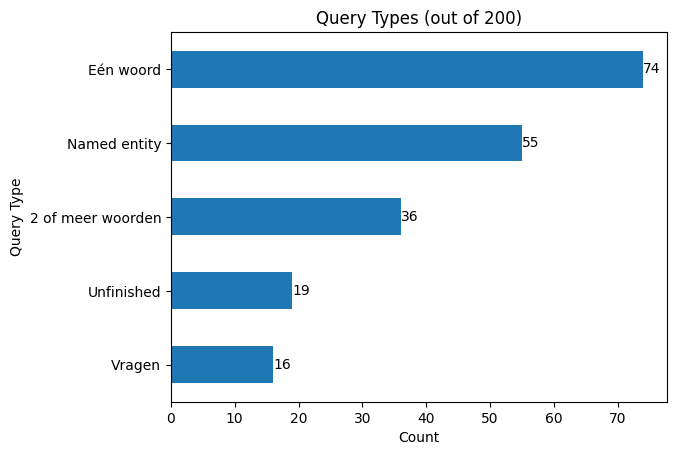

In [398]:
ax = (
    all_queries["Soort Query (select)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Query Types (out of {len(all_queries)})",
        ylabel="Query Type",
        xlabel="Count",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '36')]

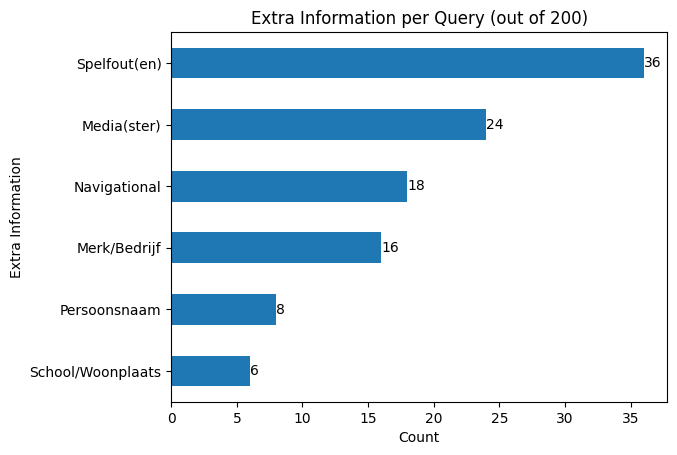

In [399]:
ax = (
    all_queries["Extra (multi)"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Extra Information per Query (out of {len(all_queries)})",
        xlabel="Count",
        ylabel="Extra Information",
    )
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '68'),
 Text(0, 0, '86')]

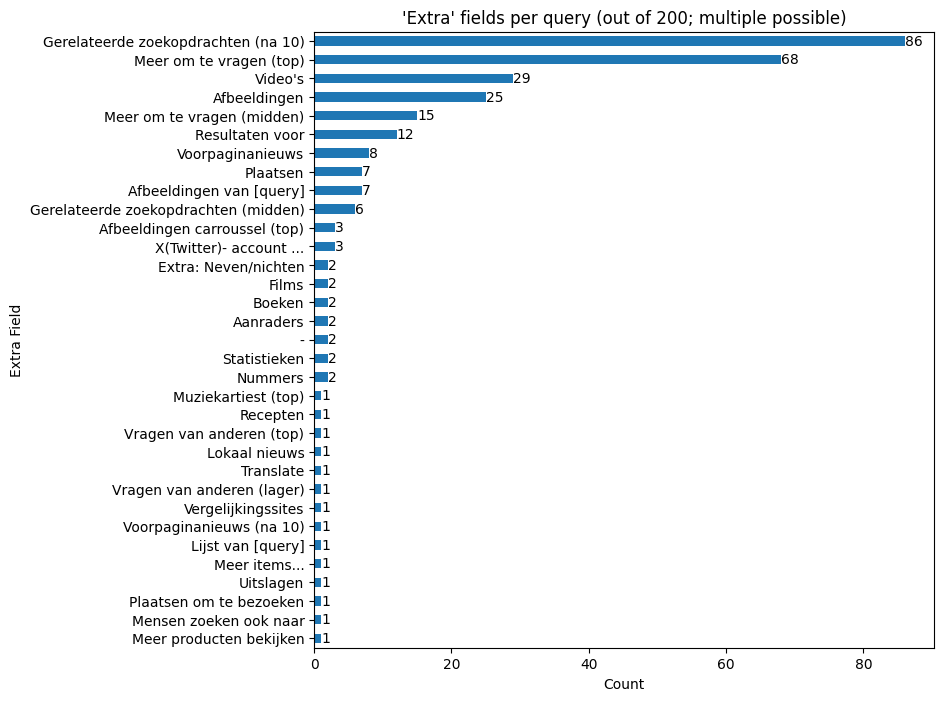

In [400]:
ax = (
    all_queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(all_queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])

# Export

In [401]:
%pip install nbconvert rpds-py==0.5.3


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [403]:
!jupyter nbconvert --to markdown analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to markdown
[NbConvertApp] Support files will be in analysis_files/
[NbConvertApp] Writing 185261 bytes to analysis.md
